# Introduction to Tree-based methods (with external dependencies)

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

This notebook wants to implement decision trees, random forests and gradient boosting.

In [1]:
import os
import sys

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

In [47]:
import pandas as pd
import cv2 #pip install opencv-python
%matplotlib inline
from scipy.stats import norm, multivariate_normal

#Useful classes for data manipulation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 

# Useful classes for model evaluation and selection
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix, mean_squared_error 

# a baseline classifier
from sklearn.linear_model import LinearRegression, RidgeCV

# The necessary models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Theory

What are decision trees?

## Classification with Decision Trees

We'll use the `sklearn` implementation of decision trees.

Let's use a dataset as an example 

In [8]:
if 'google.colab' in sys.modules:
        
    import tarfile
    !mkdir datasets
    DOWNLOAD_URL = ""
    !wget {DOWNLOAD_URL} -P {"datasets/"} 
    !mv {"datasets/season-1112.csv"} {"datasets/season-1112.csv"} 
else: 
    print("Not running on Google Colab. This cell is did not do anything.")

Not running on Google Colab. This cell is did not do anything.


In [10]:
df = pd.read_csv('datasets/season-1112.csv')#https://datahub.io/sports-data/english-premier-league and https://www.football-data.co.uk/notes.txt

This file has all matches of the 2011-2012 English Premier League season.
For each match, we have local and away goals both at half-time and at the end of the match. We also have the number of shots, shots on goal, fouls, yellow cards, red cards and betting odds from some known sites.

In [12]:
df.head()

Div      Date   HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  ...  \
0  E0  13/08/11  Blackburn       Wolves     1     2   A     1     1   D  ...   
1  E0  13/08/11     Fulham  Aston Villa     0     0   D     0     0   D  ...   
2  E0  13/08/11  Liverpool   Sunderland     1     1   D     1     0   H  ...   
3  E0  13/08/11  Newcastle      Arsenal     0     0   D     0     0   D  ...   
4  E0  13/08/11        QPR       Bolton     0     4   A     0     1   A  ...   

  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  \
0     2.06      1.96      1.89      1.82    18  -0.50     2.20     2.14   
1     2.21      2.11      1.77      1.69    21  -0.25     1.83     1.80   
2     1.92      1.85      2.01      1.92    21  -1.00     1.92     1.88   
3     1.89      1.80      2.10      1.98    20   0.50     1.84     1.79   
4     2.27      2.16      1.73      1.66    19  -0.25     2.00     1.95   

   BbMxAHA  BbAvAHA  
0     1.78     1.74  
1     2.14     2.08  
2     2.02     1.98  
3     2.16     2.10  
4     1.98     1.92  

[5 rows x 71 columns]

In [13]:
len(df)

380

In [14]:
column_names = df.columns

In [15]:
column_names

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA'],
      dtype='object')

We can play with this.

One possibility is trying to predict a winner based on all other features.

Let's make a copy before further processingHagamos una copia antes de empezar

In [17]:
df_copy=df.copy()#[['HomeTeam','AwayTeam', 'FTHG','FTAG','FTR','HTHG', 'HTAG', 'HTR','HS','AS','HST', 'AST','HF','AF', 'HY', 'AY', 'HR', 'AR']]

In [18]:
df_copy_train, df_copy_test = train_test_split(df_copy)

Let's explore the data to try and understand how a Decision Tree works.

To plot, let's look at only two features for now.

In [19]:
target_train=np.zeros(len(df_copy_train))
target_train[df_copy_train['FTR']=='H']=1.0
target_train[df_copy_train['FTR']=='D']=0.0
target_train[df_copy_train['FTR']=='A']=-1.0
features_train=np.asarray(df_copy_train[['FTHG','FTAG']])

target_test=np.zeros(len(df_copy_test))
target_test[df_copy_test['FTR']=='H']=1.0
target_test[df_copy_test['FTR']=='D']=0.0
target_test[df_copy_test['FTR']=='A']=-1.0
features_test=np.asarray(df_copy_test[['FTHG','FTAG']])

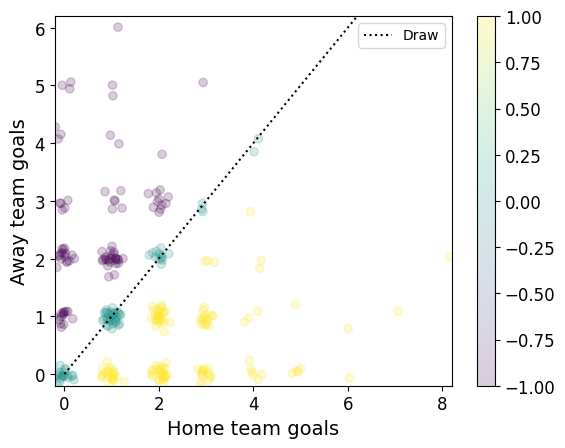

In [20]:
features_scatter=features_train+0.1*np.random.randn(len(features_train),2)
plt.scatter(features_scatter[:,0],features_scatter[:,1],c=target_train,alpha=0.2)
plt.colorbar()
xvals=np.linspace(0.0,8.0,10)
plt.plot(xvals,xvals,linestyle='dotted', color='black',label='Draw')
plt.xlabel('Home team goals')
plt.ylabel('Away team goals')
plt.xlim(-0.2,8.2)
plt.ylim(-0.2,6.2)
plt.legend(loc='upper right')

Let's forget about all the DT hyperparameters for now and just train a naive classifier:

In [21]:
dt = DecisionTreeClassifier(max_depth=None)
dt.fit(features_train,target_train)

DecisionTreeClassifier()

And let's see how it works:

In [22]:
dt.predict(np.asarray([1.0,2.0]).reshape(1,-1))

array([-1.])

/tmp/ipykernel_46625/2382861481.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xvals,yvals,Z, levels=[-1.5,-0.5,0.5,1.5],label='DT')


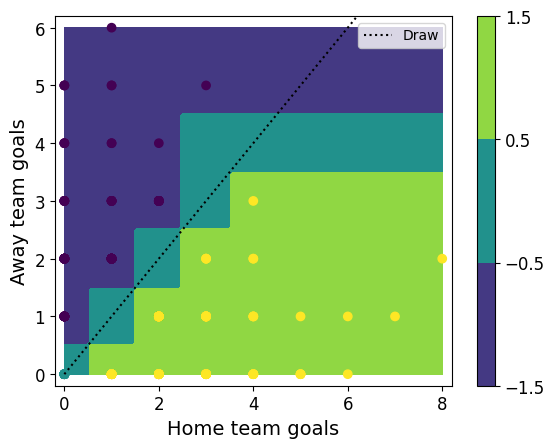

In [23]:
xvals=np.linspace(0.0,8.0,100)
yvals=np.linspace(0.0,6.0,100)
X, Y = np.meshgrid(xvals,yvals)
Z = dt.predict(np.c_[X.ravel(),Y.ravel()]).reshape(X.shape)
plt.contourf(xvals,yvals,Z, levels=[-1.5,-0.5,0.5,1.5],label='DT')
plt.colorbar()
plt.scatter(features_train[:,0],features_train[:,1],c=target_train)
plt.plot(xvals,xvals,linestyle='dotted', color='black',label='Draw')
plt.xlabel('Home team goals')
plt.ylabel('Away team goals')
plt.xlim(-0.2,8.2)
plt.ylim(-0.2,6.2)
plt.legend(loc='upper right')

It's really overfitting! Weird looking curves.

We wouldn't be able to tell from the confusion matrix though...

In [24]:
print(confusion_matrix(target_train,dt.predict(features_train)))
print(confusion_matrix(target_test,dt.predict(features_test)))

[[ 91   0   0]
 [  0  69   0]
 [  0   0 125]]
[[25  0  0]
 [ 0 24  0]
 [ 0  0 46]]


But an inspection of the defined tree would show it:

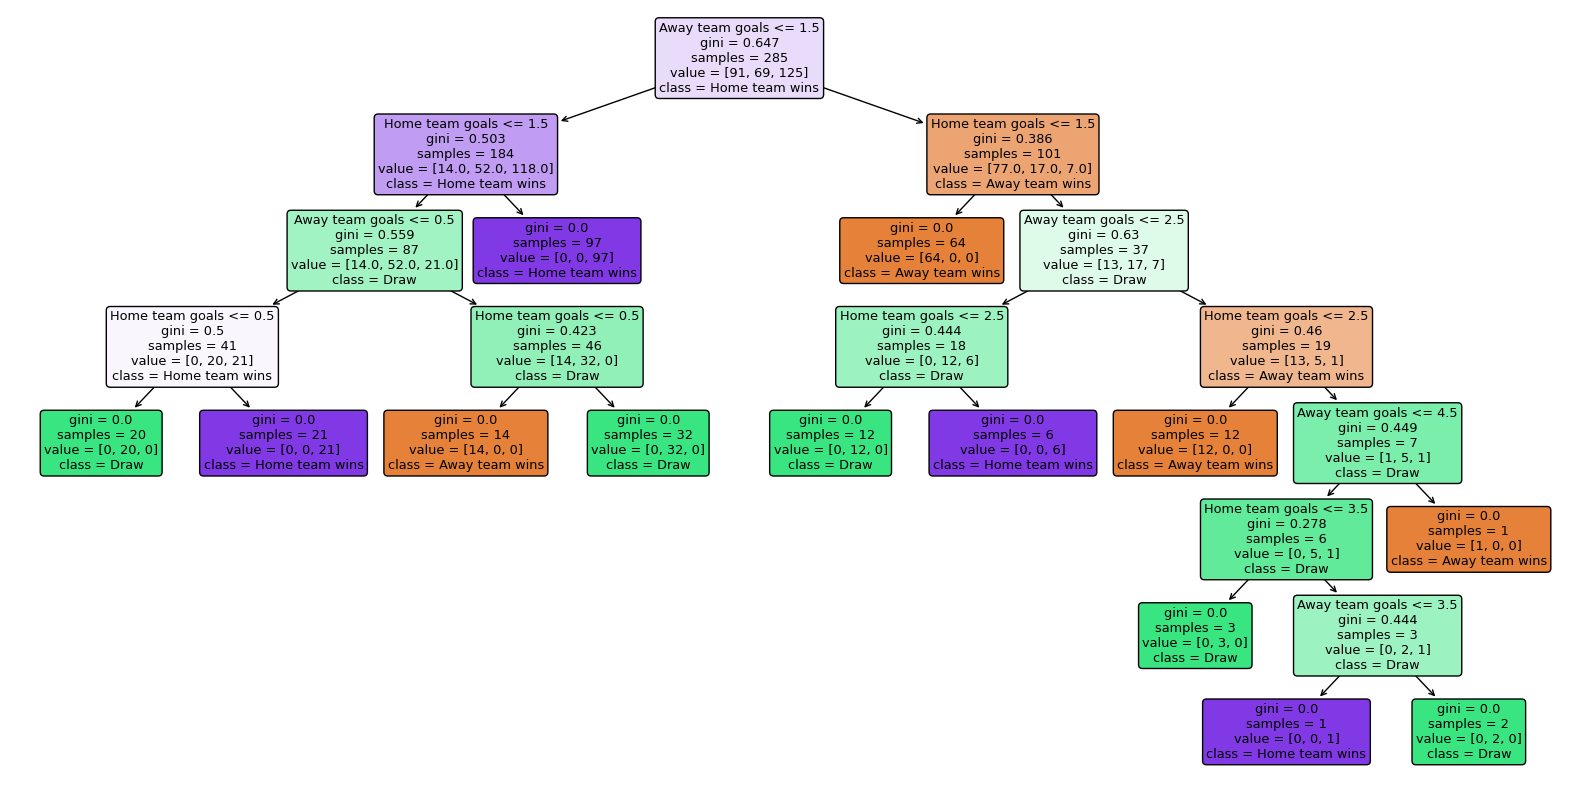

In [25]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt,filled=True,rounded=True,feature_names=["Home team goals","Away team goals"],class_names=["Away team wins","Draw","Home team wins"]) 
plt.show()

This plot can also be exported as a `.dot` file and saved as `.png`.

In [ ]:
tree.export_graphviz(
dt,
out_file="futbol.dot",
feature_names=["Home team goals","Away team goals"],
class_names=["Away team wins","Draw","Home team wins"],
rounded=True,
filled=True
)

#dot to png
if 'google.colab' in sys.modules:
    !apt-get install graphviz

! dot -Tpng futbol.dot -o futbol.png

#Plot the image
img = cv2.imread('futbol.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)

The DT can only do cuts in the individual features. Thus, it looks at home and away goals separately. But we know that in futbol the only important thing is to score more than the other team. The fact that it can only perform cuts on individual features can be a problem for DTs (but also the reason why we do not need to preprocess the features to remove units).

We can do some feature engineering

In [32]:
features_train=df_copy_train[['FTHG','FTAG']]
features_train['Local - Visitante'] = features_train['FTHG']-features_train['FTAG']
features_train=np.asarray(features_train)

features_test=df_copy_test[['FTHG','FTAG']]
features_test['Local - Visitante'] = features_test['FTHG']-features_test['FTAG']
features_test=np.asarray(features_test)

/tmp/ipykernel_46625/3998940832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train['Local - Visitante'] = features_train['FTHG']-features_train['FTAG']
/tmp/ipykernel_46625/3998940832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test['Local - Visitante'] = features_test['FTHG']-features_test['FTAG']


In [33]:
dt = DecisionTreeClassifier()
dt.fit(features_train,target_train)

DecisionTreeClassifier()

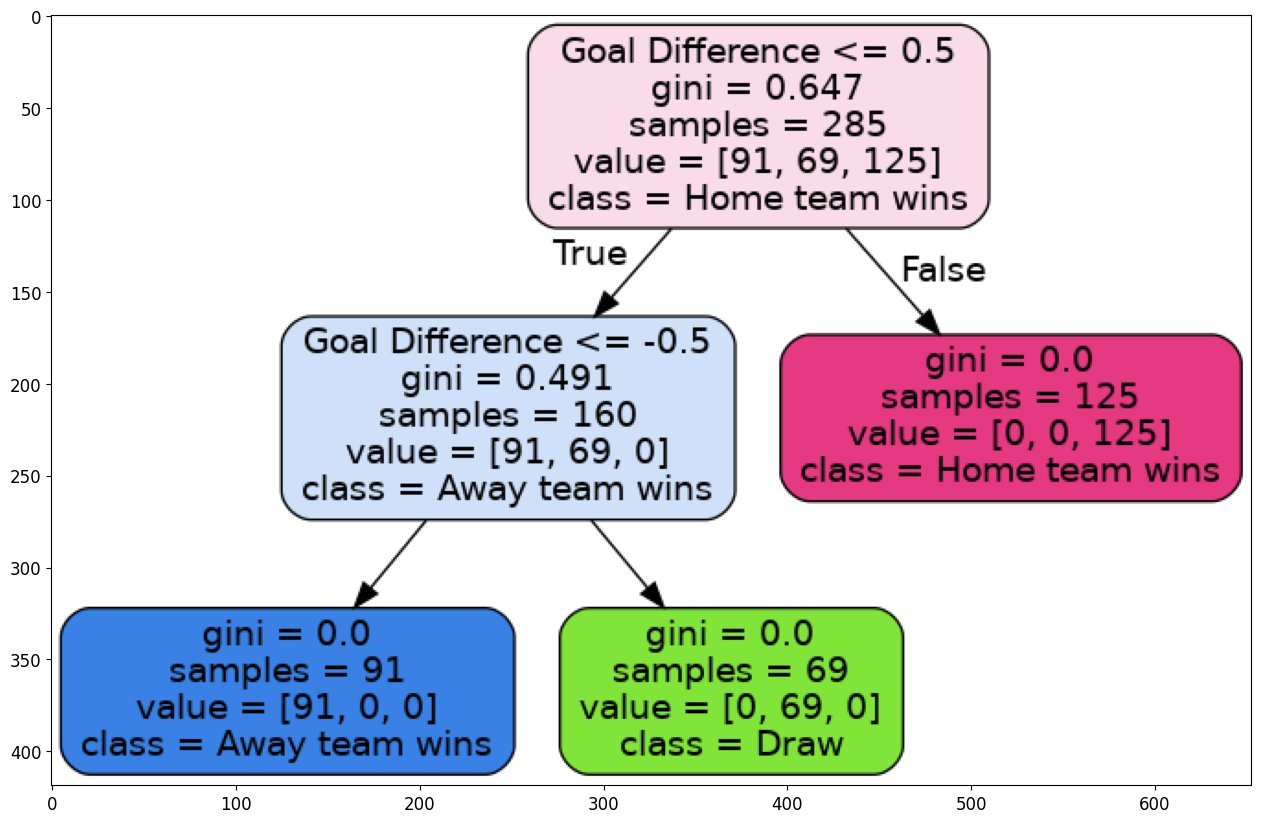

In [34]:
tree.export_graphviz(
dt,
out_file="futbol.dot",
feature_names=["Home","Away","Goal Difference"],
class_names=["Away team wins","Draw","Home team wins"],
rounded=True,
filled=True
)

#Convierto el dot a png
! dot -Tpng futbol.dot -o futbol.png

#Ploteamos el png
img = cv2.imread('futbol.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)

Much better!

For such an easy example, DTs are not particularly useful. But now let's look at all the features that are less obvious in relation to wins. Let's remove the betting scores also.

In [35]:
names_train=df_copy_train[['HomeTeam','AwayTeam']]
features_train=df_copy_train.drop(['Div','Date','Referee','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG', 'HTAG', 'HTR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA'],axis=1)

names_test=df_copy_test[['HomeTeam','AwayTeam']]
features_test=df_copy_test.drop(['Div','Date','Referee','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG', 'HTAG', 'HTR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA'],axis=1)

In [36]:
features_train

HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR
258   9  11    6    6  13   7   8   4   1   0   0   0
234   9   4    6    2  12   6   5   5   0   1   1   0
107  26   8   20    8   5   9  11   1   0   1   0   0
75   13  14    9   11  16  14   5   4   4   4   0   0
126   9  23    5   14  11  13   1  10   2   1   0   0
..   ..  ..  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..
134  25  13   16    9  10   5   7   6   0   2   0   1
266  25   8   19    3   7   9   7   7   1   2   0   0
129   7  11    3    5   4  11   5   5   0   0   0   0
153  15  10    7    5   8   6   7   5   0   0   0   0
151  16  14    9    6   6  11   8   4   1   3   0   0

[285 rows x 12 columns]

We took off the team names since we don't care about them in order to predict. The DT could use them if we turn them into a categorical variable.

Let's now look at the DT hyperparameters to regularize the algorithm. In particular, we can choose whether it uses Gini or Entropy to calculate the impurity of a split. Generally, there is no difference, but by definition, Gini may favor the most frequent class more. The advantage is that it is faster.

Looking at the other hyperparameters, the options we have in `sklearn` are:

`max_depth`: By default, this is `None`; it controls the depth of the tree.
`min_samples_split`: Sets the minimum number of samples a node must have to continue splitting it.
`min_samples_leaf`: The minimum number of samples a leaf (i.e., the end node) must have.
`min_weight_fraction_leaf`: The minimum weighted fraction of samples a leaf must have.
`max_leaf_nodes`: Maximum number of leaves.
`max_features`: Maximum number of features evaluated in a split.

If you raise the minimum values ​​or lower the maximum values, you are restricting the tree and regularizing the model.

There are other regularization methods, such as pruning, in which you train without restrictions and then remove unnecessary nodes.

In [37]:
dt=DecisionTreeClassifier()
#dt?

Let's play:

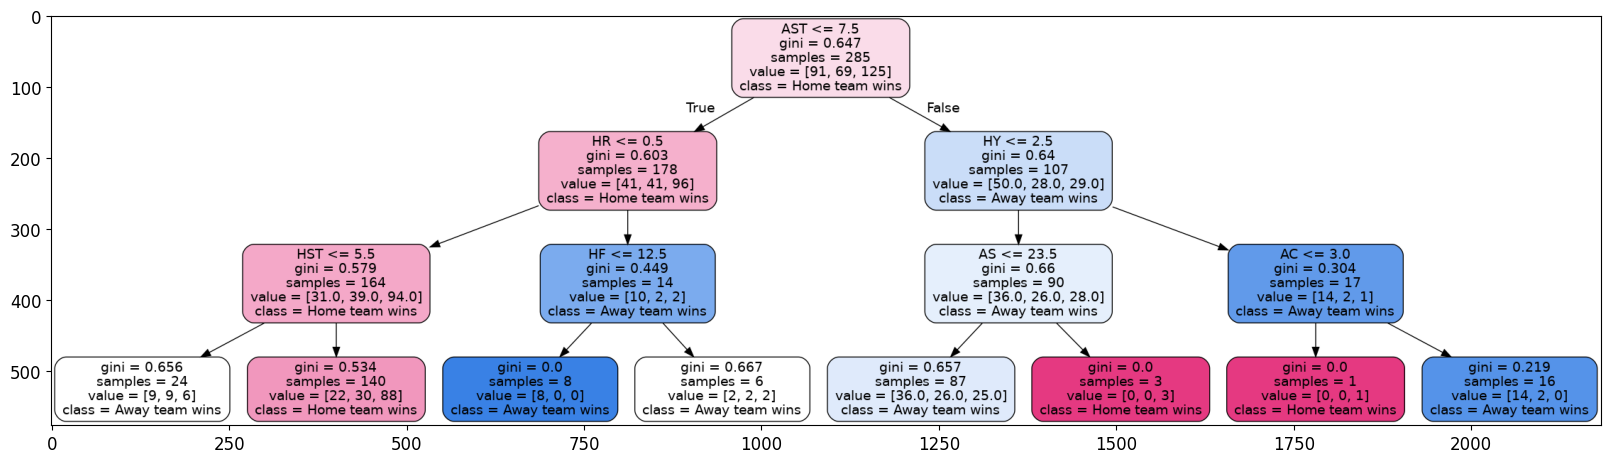

In [38]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(features_train,target_train)
tree.export_graphviz(
dt,
out_file="futbol.dot",
feature_names=features_train.columns,
class_names=["Away team wins","Draw","Home team wins"],
rounded=True,
filled=True
)

#Convierto el dot a png
! dot -Tpng futbol.dot -o futbol.png

#Ploteamos el png
img = cv2.imread('futbol.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)

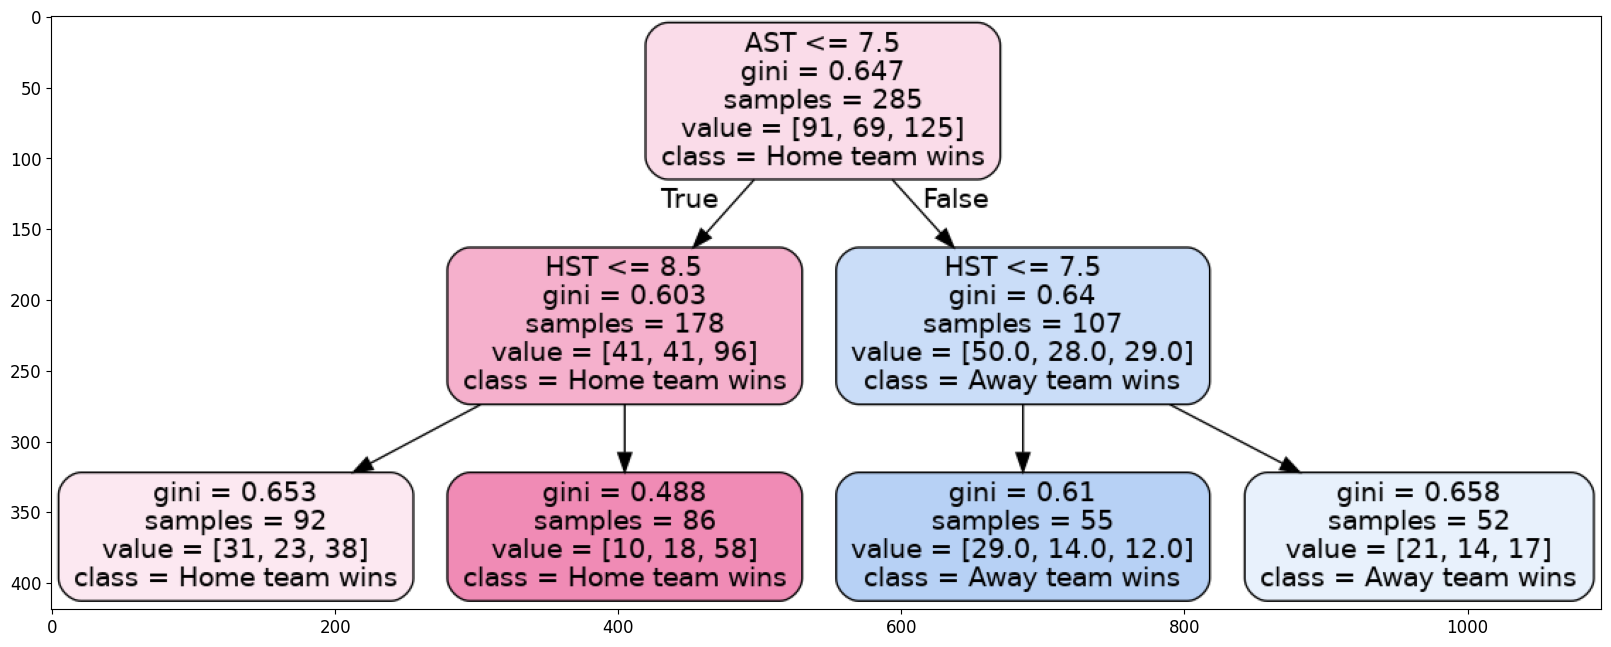

In [39]:
dt = DecisionTreeClassifier(min_samples_leaf=50,max_depth=100)
dt.fit(features_train,target_train)
tree.export_graphviz(
dt,
out_file="futbol.dot",
feature_names=features_train.columns,
class_names=["Away team wins","Draw","Home team wins"],
rounded=True,
filled=True
)

#Convierto el dot a png
! dot -Tpng futbol.dot -o futbol.png

#Ploteamos el png
img = cv2.imread('futbol.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)

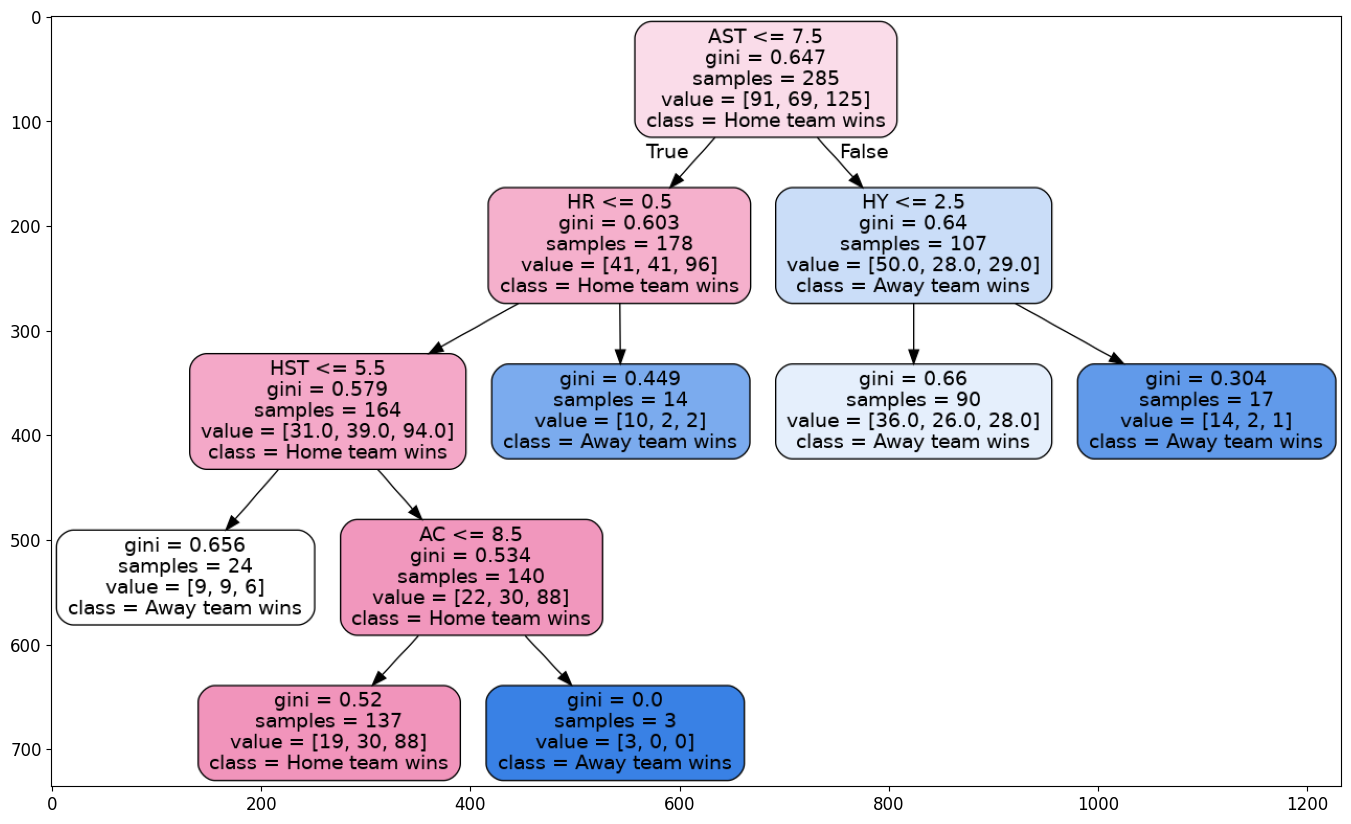

In [40]:
dt = DecisionTreeClassifier(max_leaf_nodes=6)
dt.fit(features_train,target_train)
tree.export_graphviz(
dt,
out_file="futbol.dot",
feature_names=features_train.columns,
class_names=["Away team wins","Draw","Home team wins"],
rounded=True,
filled=True
)

#Convierto el dot a png
! dot -Tpng futbol.dot -o futbol.png

#Ploteamos el png
img = cv2.imread('futbol.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)

Now let's really optimize things

In [42]:
dt = DecisionTreeClassifier()
params={'max_depth':[2, 3, 5],'min_samples_leaf':[10,50], 'max_leaf_nodes':[3,4,5]}
grid=GridSearchCV(dt,params,cv=10,scoring='accuracy')
grid.fit(features_train,target_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5], 'max_leaf_nodes': [3, 4, 5],
                         'min_samples_leaf': [10, 50]},
             scoring='accuracy')

In [43]:
grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 10}

In [44]:
model=grid.best_estimator_

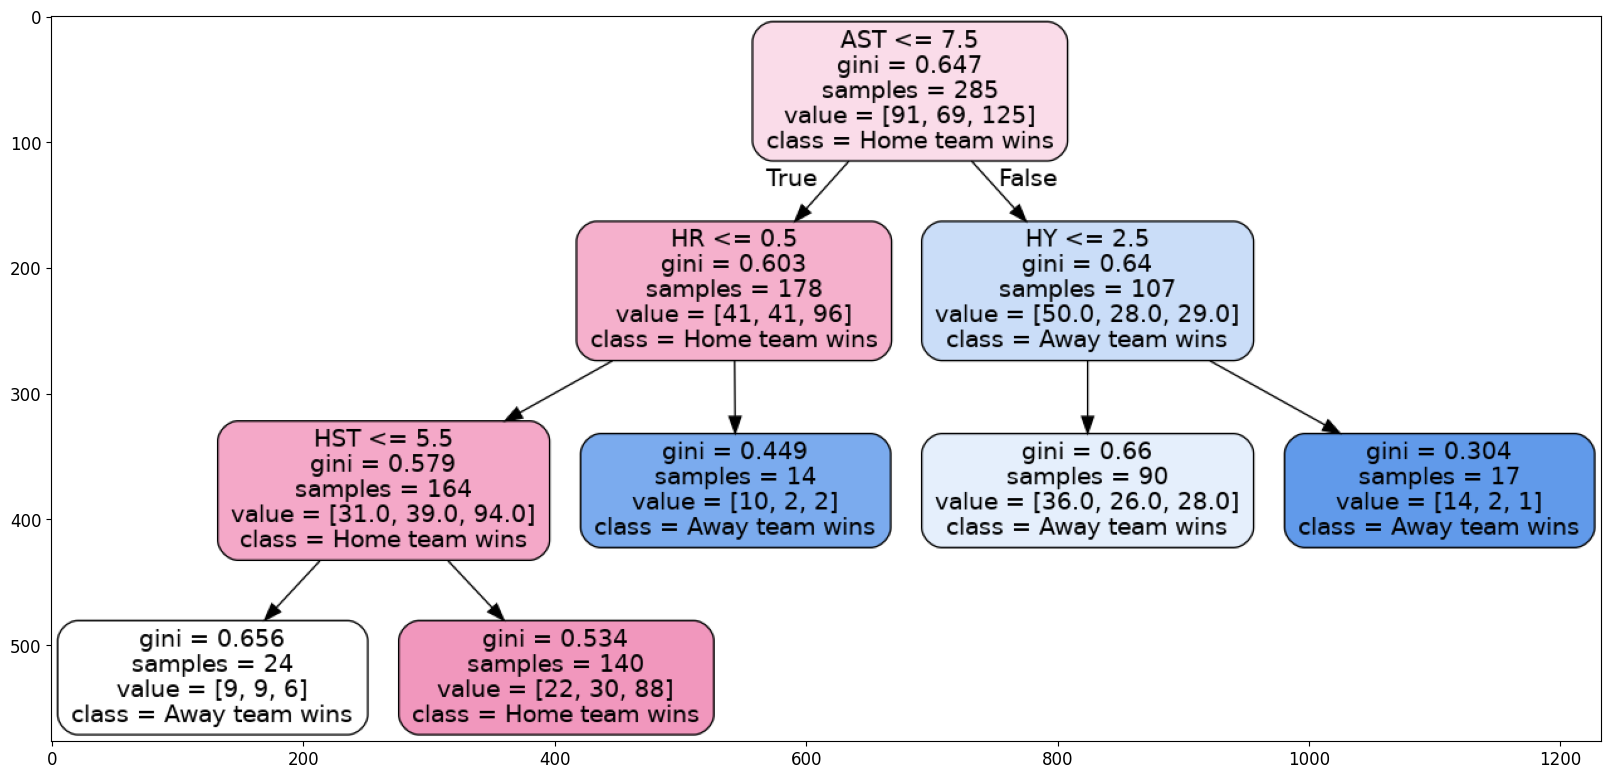

In [45]:
tree.export_graphviz(
model,
out_file="futbol.dot",
feature_names=features_train.columns,
class_names=["Away team wins","Draw","Home team wins"],
rounded=True,
filled=True
)

#Convierto el dot a png
! dot -Tpng futbol.dot -o futbol.png

#Ploteamos el png
img = cv2.imread('futbol.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)

In [48]:

predicts = cross_val_predict(model,features_train,target_train,cv=5)
print(confusion_matrix(target_train,predicts))
print(recall_score(np.where(target_train==-1.0,1.0,0.0),np.where(predicts==-1.0,1.0,0.0)))
print(recall_score(np.where(target_train==0.0,1.0,0.0),np.where(predicts==0.0,1.0,0.0)))
print(recall_score(np.where(target_train==1.0,1.0,0.0),np.where(predicts==1.0,1.0,0.0)))

print(accuracy_score(np.where(target_train==-1.0,1.0,0.0),np.where(predicts==-1.0,1.0,0.0)))
print(accuracy_score(np.where(target_train==0.0,1.0,0.0),np.where(predicts==0.0,1.0,0.0)))
print(accuracy_score(np.where(target_train==1.0,1.0,0.0),np.where(predicts==1.0,1.0,0.0)))

print(confusion_matrix(target_test,model.predict(features_test)))

[[54  1 36]
 [32  1 36]
 [45  1 79]]
0.5934065934065934
0.014492753623188406
0.632
0.6
0.7543859649122807
0.5859649122807018
[[15  0 10]
 [12  0 12]
 [16  0 30]]


In [49]:
print(model.predict_proba(features_train[:3]))
print(np.argmax(model.predict_proba(features_train[:3]),axis=1)-1)
print(model.predict(features_train[:3]))

[[0.15714286 0.21428571 0.62857143]
 [0.71428571 0.14285714 0.14285714]
 [0.4        0.28888889 0.31111111]]
[ 1 -1 -1]
[ 1. -1. -1.]


In [50]:
print(np.where(model.predict(features_train[:3])==-1.0,1.0,0.0))
print(np.where(model.predict(features_train[:3])==0.0,1.0,0.0))
print(np.where(model.predict(features_train[:3])==1.0,1.0,0.0))

[0. 1. 1.]
[0. 0. 0.]
[1. 0. 0.]


In [52]:
thresholds=[0.2, 0.4,0.6, 0.8]
for threshold in thresholds:
  print("Threshold "+str(threshold)+'\n')
  y_pred_away=np.where(model.predict_proba(features_train)[:,0]>=threshold,1.0,0.0)
  y_pred_draw=np.where(model.predict_proba(features_train)[:,1]>=threshold,1.0,0.0)
  y_pred_home=np.where(model.predict_proba(features_train)[:,2]>=threshold,1.0,0.0)
  print(accuracy_score(np.where(target_train==-1.0,1.0,0.0),y_pred_away))
  print(accuracy_score(np.where(target_train==0.0,1.0,0.0),y_pred_draw))
  print(accuracy_score(np.where(target_train==1.0,1.0,0.0),y_pred_home))
  print("\n")

Threshold 0.2

0.656140350877193
0.32280701754385965
0.5263157894736842


Threshold 0.4

0.6771929824561403
0.7578947368421053
0.6877192982456141


Threshold 0.6

0.7403508771929824
0.7578947368421053
0.6877192982456141


Threshold 0.8

0.7192982456140351
0.7578947368421053
0.5614035087719298




In [53]:
print(recall_score(np.where(target_train==-1.0,1.0,0.0),np.where(np.argmax(model.predict_proba(features_train),axis=1)==0,1.0,0.0)))
print(recall_score(np.where(target_train==0.0,1.0,0.0),np.where(np.argmax(model.predict_proba(features_train),axis=1)==1,1.0,0.0)))
print(recall_score(np.where(target_train==1.0,1.0,0.0),np.where(np.argmax(model.predict_proba(features_train),axis=1)==2,1.0,0.0)))

0.7582417582417582
0.0
0.704


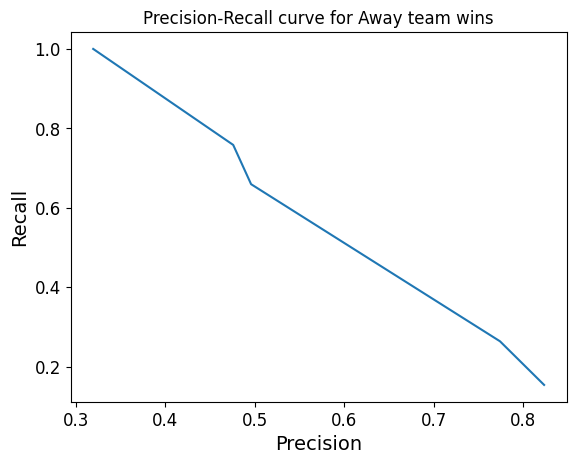

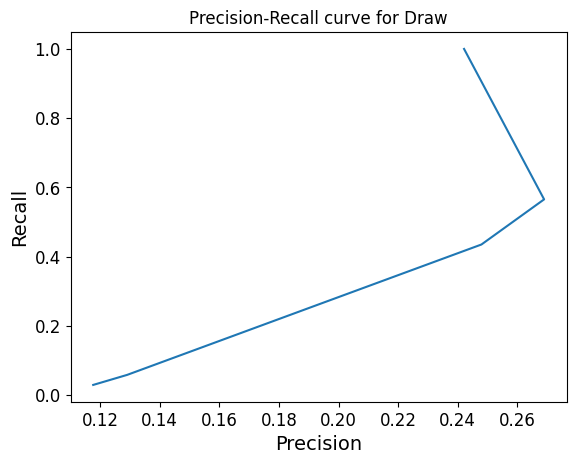

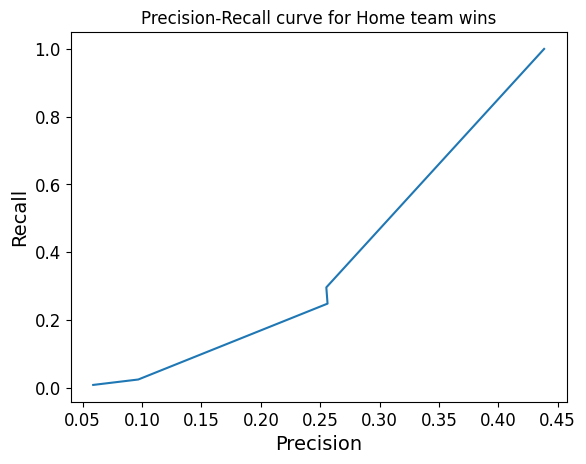

In [56]:
from sklearn.metrics import precision_recall_curve
class_names=['Away team wins', 'Draw', 'Home team wins']
for nclass_label, class_label in enumerate([-1.0,0.0,1.0]):
  precision, recall, thresholds = precision_recall_curve(target_train,model.predict_proba(features_train)[:,0],pos_label=class_label)
  plt.plot(precision[:-1],recall[:-1])
  plt.title('Precision-Recall curve for '+str(class_names[nclass_label]))
  plt.xlabel('Precision')
  plt.ylabel('Recall')
  # plt.xlim(0.0,1.0)
  # plt.ylim(0.0,1.0)
  plt.show()

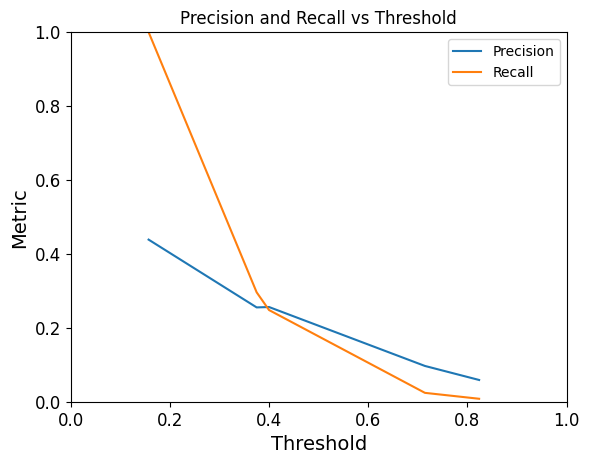

In [59]:
plt.plot(thresholds,precision[:-1],label='Precision')
plt.plot(thresholds,recall[:-1],label='Recall')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric')
plt.legend()
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.show()

It's hard to predict draws!

## Exercise:

Add bets as features and optimize the DT. What do you find? Can you assess feature importance? In particular, is it more important to see at "in-game" info or "pre-game" bets?

In [60]:
###START_EXERCISE
# You can add your solution in this code cell.
###STOP_EXERCISE

In [ ]:
###START_SOLUTION
###STOP_SOLUTION

## Regression

Let's see how DTs can be used for regression with a synthetic dataset:

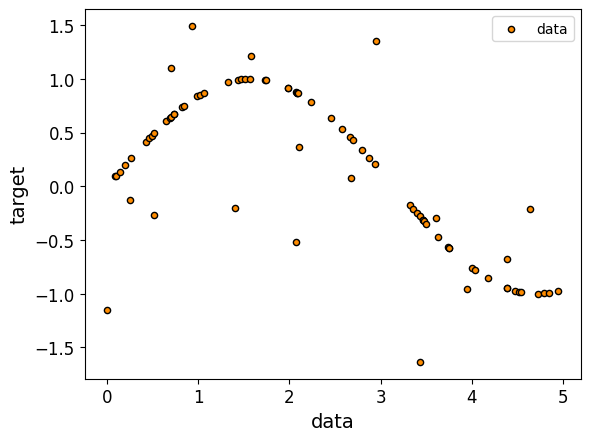

In [61]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]


# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
#plt.title("Decision Tree Regression")
plt.legend()
plt.show()

We can see how DTs operate by exploring different depths:

In [62]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5,min_samples_leaf=5)
regr_1.fit(X, y)
regr_2.fit(X, y)
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

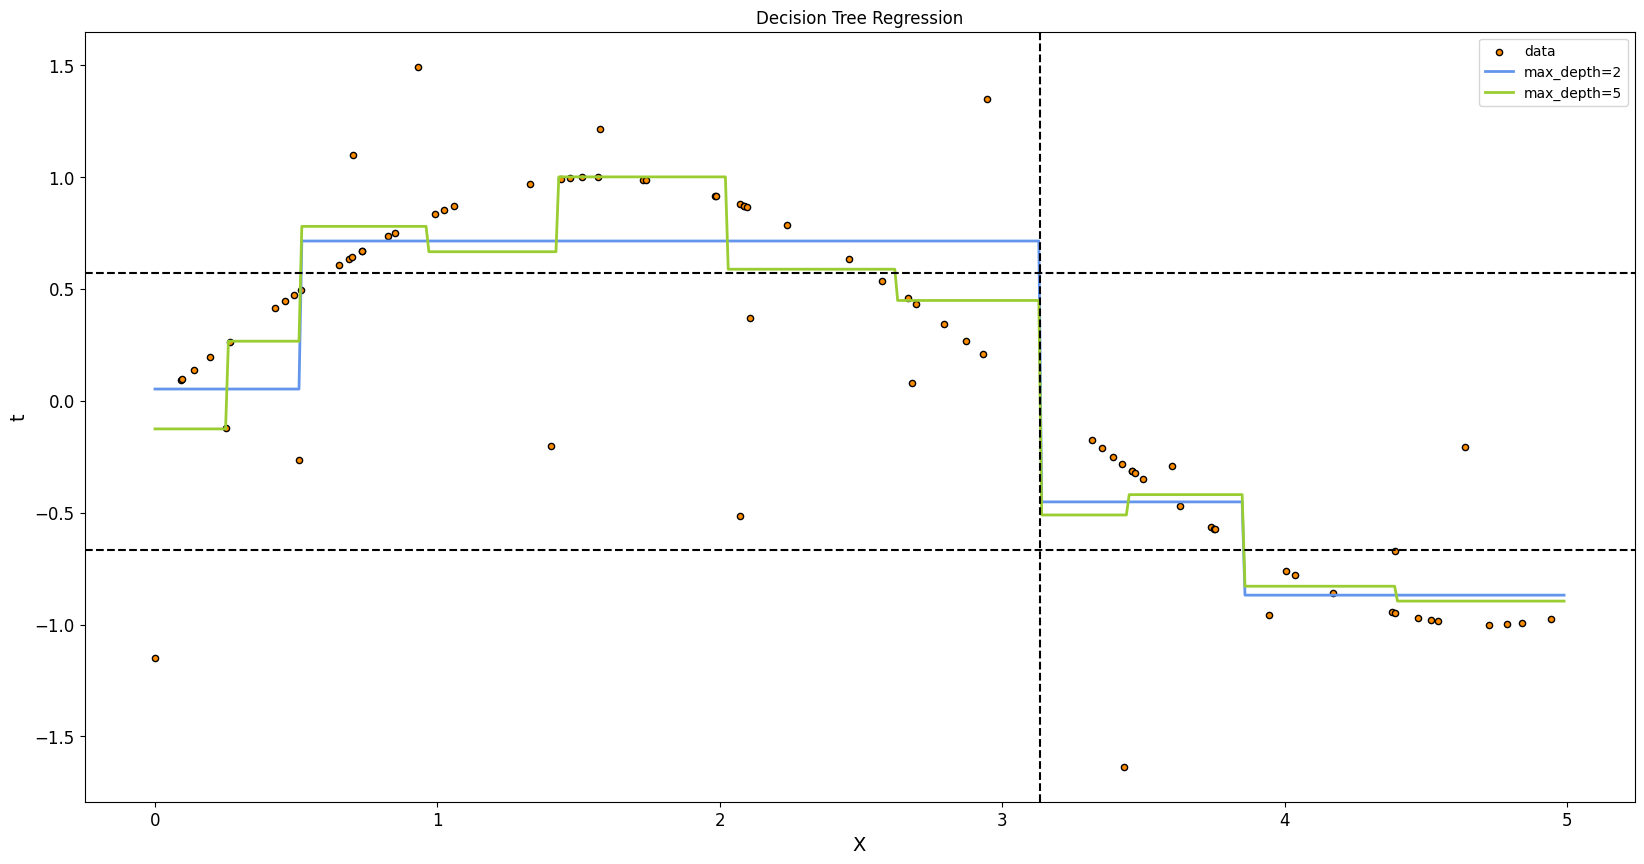

In [63]:
# Plot the results
plt.figure(figsize=(20,10))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.axvline(3.133,linestyle='dashed',color='black')
plt.axhline(0.571,linestyle='dashed',color='black')
plt.axhline(-0.667,linestyle='dashed',color='black')
plt.xlabel("X")
plt.ylabel("t")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

The tree decides on a predicted value by doing cuts in feature space. `max_depth` controls the number of cuts the algorithm makes. Let's see how the target is assigned:

In [64]:
np.mean(y)

0.12215899268094885

In [65]:
mean_squared_error(np.mean(y)*np.ones(len(y)),y)

0.5471130002937142

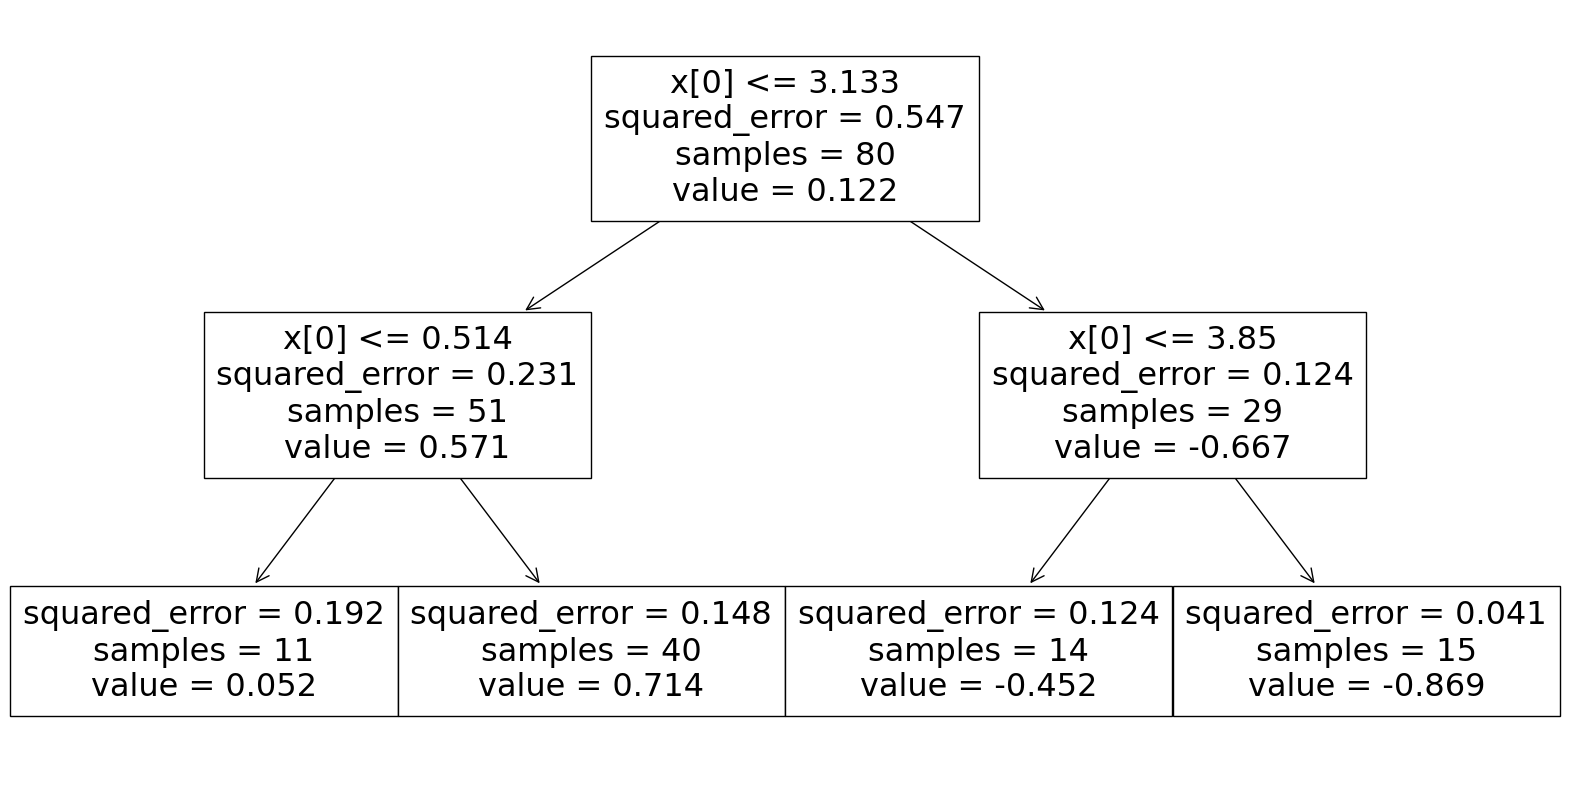

In [67]:
plt.figure(figsize=(20,10))
tree.plot_tree(regr_1) 
plt.show()

In [71]:
y_first_cut=y[(X[:,0]<=3.133)]
print(np.mean(y_first_cut),np.mean(y[(X[:,0]>3.133)]))
print(mean_squared_error(np.mean(y_first_cut)*np.ones(len(y_first_cut)),y_first_cut))

0.5711567593351029 -0.6674577693660114
0.23136965662280937


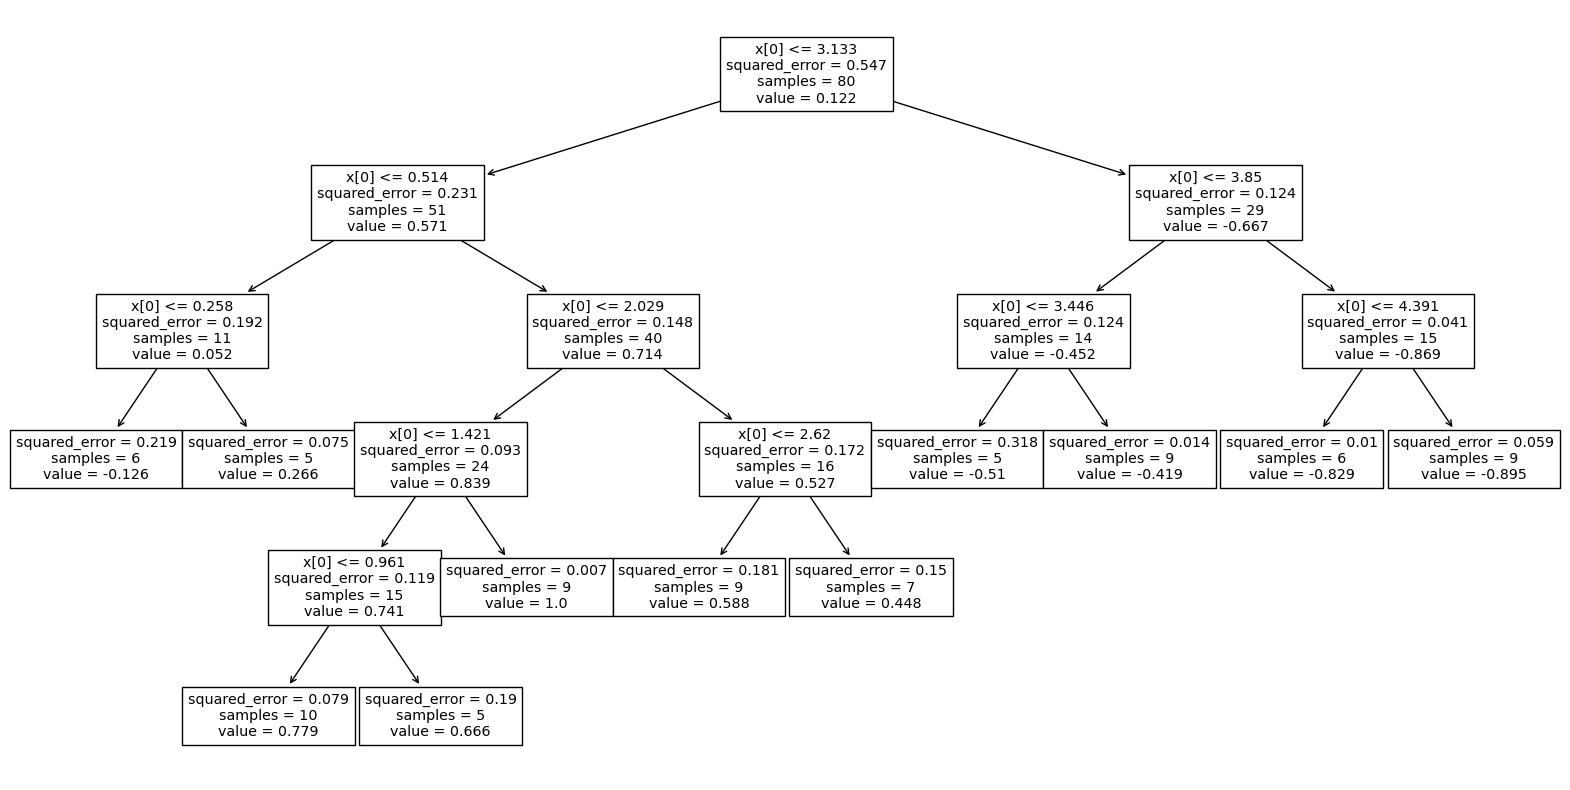

In [68]:
plt.figure(figsize=(20,10))
tree.plot_tree(regr_2) 
plt.show()

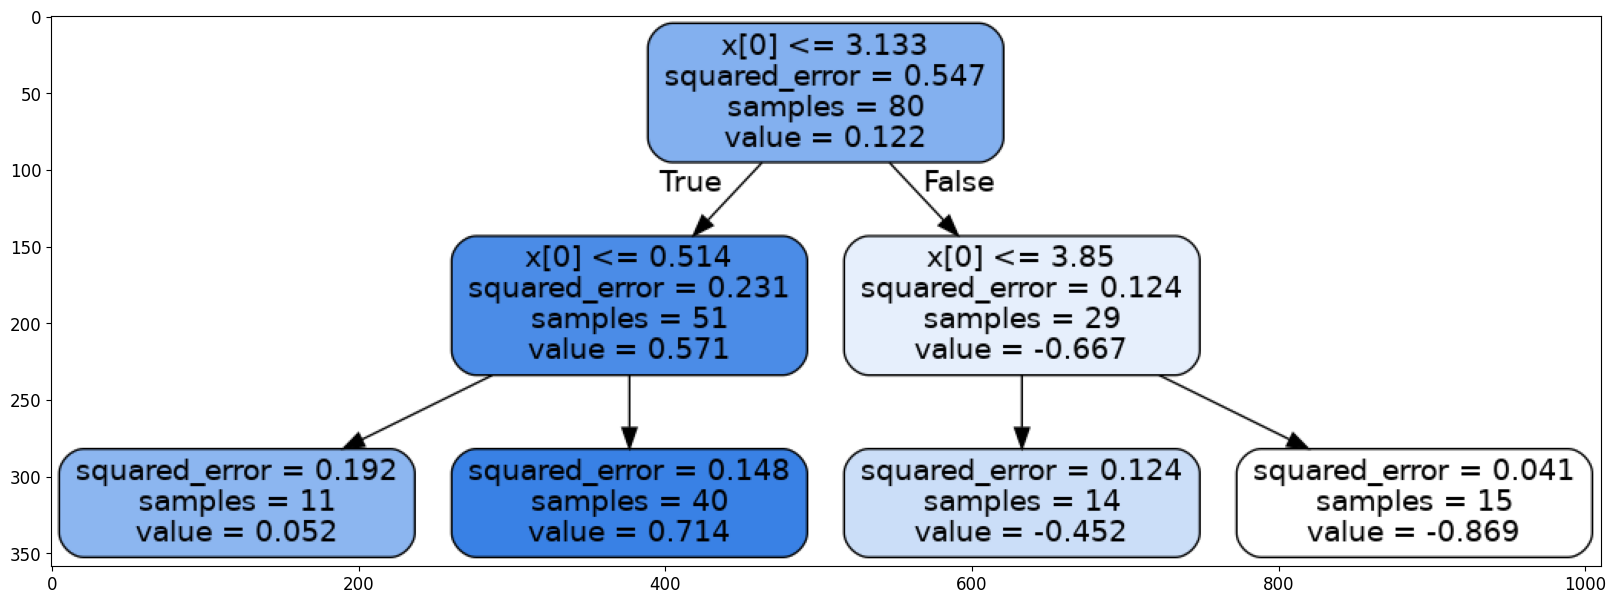

In [69]:
tree.export_graphviz(
regr_1,
out_file="reg_tree.dot",
rounded=True,
filled=True
)

#Convierto el dot a png
! dot -Tpng reg_tree.dot -o reg_tree.png

#Ploteamos el png
img = cv2.imread('reg_tree.png')
plt.figure(figsize = (20, 10))
plt.imshow(img)

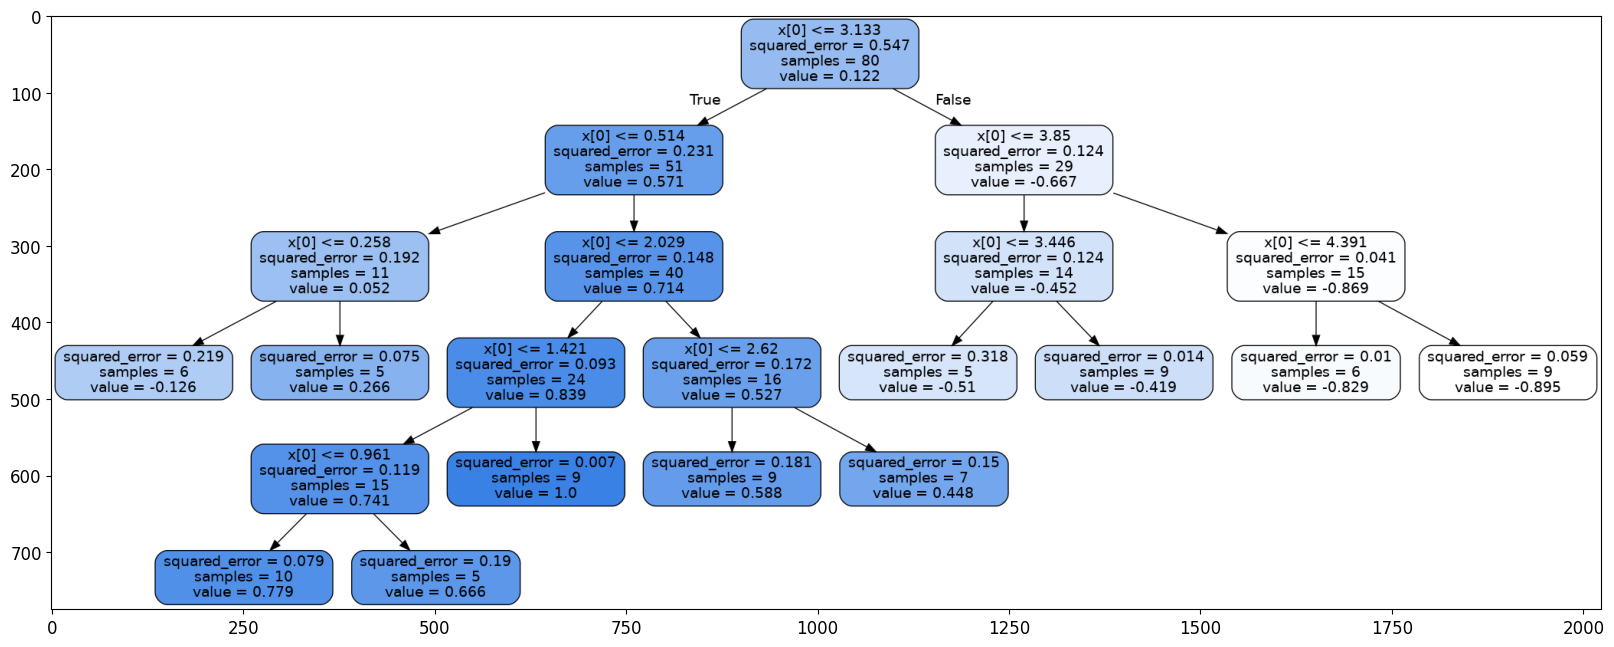

In [70]:
tree.export_graphviz(
regr_2,
out_file="reg_tree.dot",
rounded=True,
filled=True
)

#Convierto el dot a png
! dot -Tpng reg_tree.dot -o reg_tree.png

#Ploteamos el png
img = cv2.imread('reg_tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

To select the cut, it does not consider neither Gini nor entropy, it uses the MSE! Additionally, it assigns as predicted target the mean of all features before the cut is made.

## Exercise:

Let's consider the California dataset. Train a DT to predict the house price. Optimize the hyperparameter and report the RMSE and a predicted vs actual house value.

In [72]:
HOUSING_PATH = "datasets"
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
### from Geron

if 'google.colab' in sys.modules:
        
    import tarfile

    DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/master/"
    HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

    !mkdir -p ./datasets/housing

    def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
        os.makedirs(housing_path, exist_ok=True)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        #urllib.request.urlretrieve(housing_url, tgz_path)
        !wget {HOUSING_URL} -P {housing_path}
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

    # Corramos la función
    fetch_housing_data()

else: 
    print("Not running on Google Colab. This cell is did not do anything.")

Not running on Google Colab. This cell is did not do anything.


In [79]:
housing_pre = load_housing_data()
from sklearn.model_selection import StratifiedShuffleSplit

housing_pre["income_cat"] = pd.cut(housing_pre["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=445543)
for train_index, test_index in split.split(housing_pre, housing_pre["income_cat"]):
    california_housing_train = housing_pre.loc[train_index]
    california_housing_test = housing_pre.loc[test_index]

for set_ in (california_housing_train, california_housing_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [80]:
housing=california_housing_train.copy()

problematic_columns = ['median_house_value', 'housing_median_age', 'median_income']
max_values=[]
for col in problematic_columns:
    max_value = housing[col].max()
    print(f"{col}: {sum(housing[col] == max_value)} districts with {col} = {max_value} ({round(sum(housing[col] == max_value)/len(housing)*100,2)}%).")
    max_values.append(max_value)

housing_clean = housing.copy()
for col, max_value in zip(problematic_columns, max_values):
    housing_clean = housing_clean[housing_clean[col] != max_value]

housing_test=california_housing_test.copy()
housing_test_clean = housing_test.copy()
for col, max_value in zip(problematic_columns, max_values):
    housing_test_clean = housing_test_clean[housing_test_clean[col] != max_value]

median_house_value: 762 districts with median_house_value = 500001.0 (4.61%).
housing_median_age: 997 districts with housing_median_age = 52.0 (6.04%).
median_income: 42 districts with median_income = 15.0001 (0.25%).


In [81]:
housing_clean["rooms_per_household"] = housing_clean["total_rooms"]/housing_clean["households"]
housing_clean["bedrooms_per_room"] = housing_clean["total_bedrooms"]/housing_clean["total_rooms"]
housing_clean["population_per_household"]=housing_clean["population"]/housing_clean["households"]

housing_test_clean["rooms_per_household"] = housing_test_clean["total_rooms"]/housing_test_clean["households"]
housing_test_clean["bedrooms_per_room"] = housing_test_clean["total_bedrooms"]/housing_test_clean["total_rooms"]
housing_test_clean["population_per_household"]=housing_test_clean["population"]/housing_test_clean["households"]

In [82]:
housing_labels = housing_clean["median_house_value"].copy()
housing_clean = housing_clean.drop("median_house_value", axis=1) # drop labels for training set
housing_num = housing_clean.drop("ocean_proximity", axis=1)

housing_test_labels = housing_test_clean["median_house_value"].copy()
housing_test_clean = housing_test_clean.drop("median_house_value", axis=1) # drop labels for training set
housing_test_num = housing_test_clean.drop("ocean_proximity", axis=1)

Some useful preprocessing

In [83]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),#hay mas opciones aca
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_clean)
housing_test_prepared=full_pipeline.transform(housing_test_clean)

In [ ]:
###START_EXERCISE
# You can add your solution in this code cell.
###STOP_EXERCISE

In [ ]:
###START_SOLUTION
###STOP_SOLUTION

## Another nice example

This is verbatim from `sklearn` documentation:

In [84]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/mszewc/scikit_learn_data


We can try to predict the lower half of a face using the upper half:

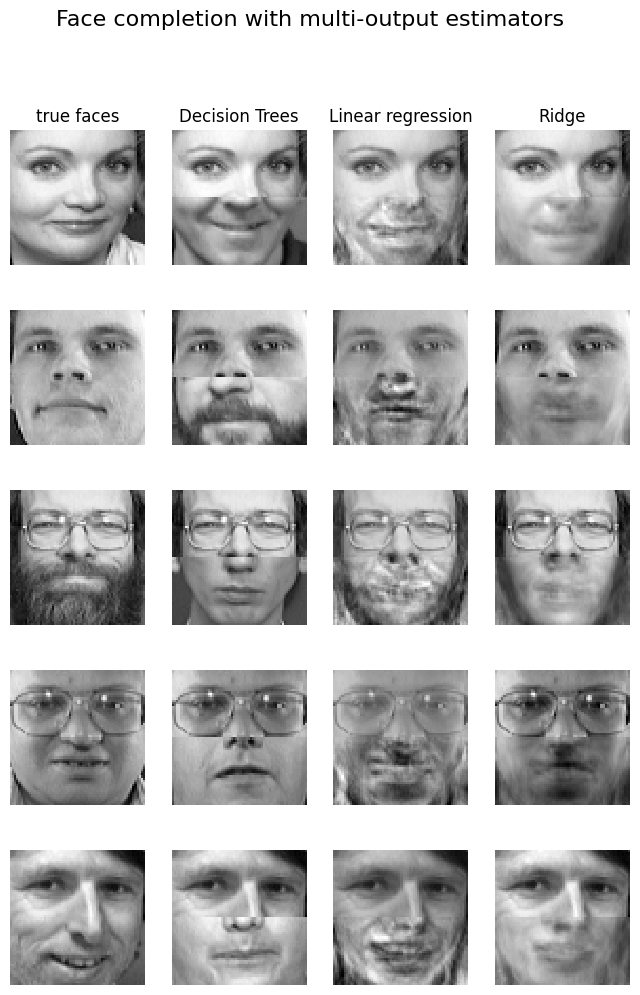

In [85]:
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Decision Trees": DecisionTreeRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

## Bagging and Random Forests

In [ ]:
# Let us define a couple of useful functions (if in colab, otherwise, take from utils module)
if 'google.colab' in sys.modules:

    def plot_clasi(x, t, ws, labels=[], xp=[-1., 1.], thr=[0,], spines='zero', equal=True, 
                   join_centers=False, margin=None):
        """
        Figura con el resultado del ajuste lineal
        """
        assert len(labels) == len(ws) or len(labels) == 0
        assert len(ws) == len(thr)

        if margin is None:
            margin = [False] * len(ws)
        else:    
            margin = np.atleast_1d(margin)
        assert len(margin) == len(ws)

        if len(labels) == 0:
            labels = np.arange(len(ws)).astype('str')

        # Agregemos el vector al plot
        fig = plt.figure(figsize=(9, 7))
        ax = fig.add_subplot(111)

        xc1 = x[t == np.unique(t).max()]
        xc2 = x[t == np.unique(t).min()]

        ax.plot(*xc1.T, 'ob', mfc='None', label='C1')
        ax.plot(*xc2.T, 'or', mfc='None', label='C2')

        for i, w in enumerate(ws):

            # Compute vector norm
            wnorm = np.sqrt(np.sum(w**2))

            # Ploteo vector de pesos
            x0 = 0.5 * (xp[0] + xp[1])
            ax.quiver(0, thr[i]/w[1], w[0]/wnorm, w[1]/wnorm, 
                      color='C{}'.format(i+2), scale=10, label=labels[i], 
                      zorder=10)

            # ploteo plano perpendicular
            xp = np.array(xp)
            yp = (thr[i] - w[0]*xp)/w[1] 

            plt.plot(xp, yp, '-', color='C{}'.format(i+2))

            # Plot margin
            if margin[i]:
                for marg in [-1, 1]:
                    ym = yp + marg/w[1]
                    plt.plot(xp, ym, ':', color='C{}'.format(i+2))


        if join_centers:
            # Ploteo línea que une centros de los conjuntos
            mu1 = xc1.mean(axis=1)
            mu2 = xc2.mean(axis=1)
            ax.plot([mu1[0], mu2[0]], [mu1[1], mu2[1]], 'o:k', mfc='None', ms=10)    

        ax.legend(loc=0, fontsize=12)
        if equal:
            ax.set_aspect('equal')

        if spines is not None:
            for a in ['left', 'bottom']:
                ax.spines[a].set_position('zero')
            for a in ['top', 'right']:
                ax.spines[a].set_visible(False)

        return


    def makew(fitter):

        # # Obtengamos los pesos y normalicemos
        w = fitter.coef_.copy()

        # # Incluye intercept
        if fitter.fit_intercept:
            w = np.hstack([fitter.intercept_.reshape(1,1), w])

        # # Normalizon
        #w /= np.linalg.norm(w)
        return w.T
else:
  from utils import plot_clasi
#Utility form A. Gèron
def plot_decision_regions(clf, X, t, axes=None, npointsgrid=500, legend=False, 
                          plot_training=True, 
                          figkwargs={'figsize': [12, 8]}, 
                          contourkwargs={'alpha':0.3}):
    """
    Plot decision regions produced by classifier.

    :param Classifier clf: sklearn classifier supporting XXX
    """

    fig = plt.figure(**figkwargs)
    ax = fig.add_subplot(111)

    if axes is None:
        dx = X[:, 0].max() - X[:, 0].min()
        dy = X[:, 1].max() - X[:, 1].min()
        axes = [X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx, 
                X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy]
        
    # Define grid for regions
    x1s = np.linspace(axes[0], axes[1], npointsgrid)
    x2s = np.linspace(axes[2], axes[3], npointsgrid)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Make predictions on points of grid; reshape to grid format
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    #custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, **contourkwargs)

#     custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
#         plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    if plot_training:
        for label in np.unique(t):
            ax.plot(X[:, 0][t==label], X[:, 1][t==label], "o", label="C{}".format(label))

    # Axis
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    if legend:
        plt.legend(loc="lower right", fontsize=14)

    plt.show()
    return fig
    
    


# Random Forests

Un RandomForest es un ensemble de DTs entrenados con Bagging, donde cada nodo elige un conjunto al azar de features para decidir. En particular, esta optimizado para DTs, por lo que es mas eficiente que poner un ensemble de DTs en BaggingClassifier.

La decision de tomar features al azar en cada nodo vuelve mas irregular la frontera de decision pero reduce un poco mas el error de clasificacion.

## Preparación del Moons dataset

Usemos de nuevo la función `make_moons` para generar un dataset no linealmente separable en dos dimensiones (para poder plotear).

In [ ]:
from sklearn.datasets import make_moons
X, t = make_moons(n_samples=400, noise=0.25, random_state=1234)

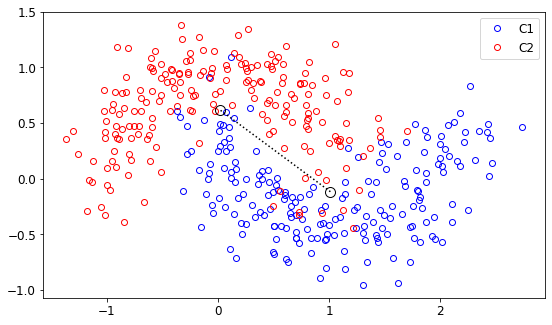

In [ ]:
plot_clasi(X, t, [], [], [], [], spines=None)

In [ ]:
from sklearn.model_selection import train_test_split

# Split
X, X_test, t, t_test = train_test_split(X, t, test_size=0.2)

## Entrenamiento simple de un Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=6)
rf.fit(X, t)

RandomForestClassifier(max_depth=2, n_jobs=6)

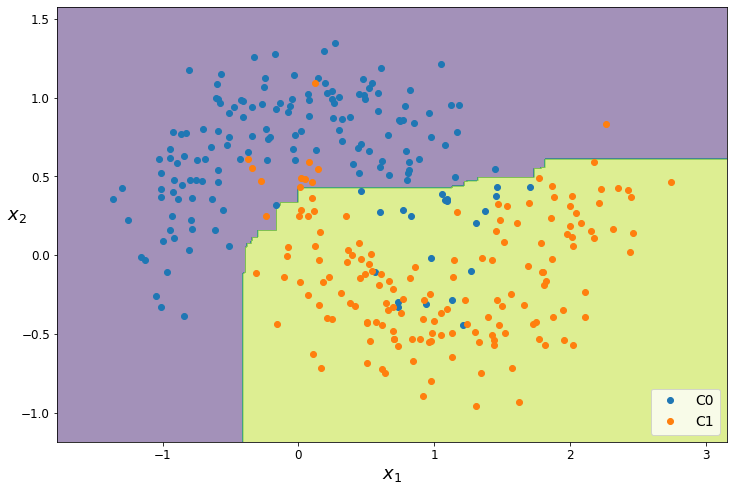

In [ ]:
fig = plot_decision_regions(rf, X, t, legend=True, npointsgrid=500, 
                            figkwargs={'figsize': [12, 8]}, 
                            contourkwargs={'alpha':0.5, 'levels':5, 'cmap':'viridis'})

**Claramente es un modelo que no generaliza bien**

In [ ]:
from sklearn.metrics import accuracy_score

y_train = rf.predict(X)
y_test = rf.predict(X_test)
print('Accuracy (train): {:.3f}'.format(accuracy_score(t, y_train)))
print('Accuracy (test): {:.3f}'.format(accuracy_score(t_test, y_test)))

Accuracy (train): 0.897
Accuracy (test): 0.863


Algo bastante interesante es que RandomForest permite ver cual feature es mas importante. Debido a su naturaleza de caja blanca sabemos que para un DT el feature mas importante esta en su raiz. En general, los features mas importantes van a estar lo mas cerca posible de la raiz.

Por lo tanto, podemos usar el RandomForest como distintas mediciones de importancia de feature y haciendo estadistica sobre los DTs que aparecen en el sacar una estimacion de la importancia de cada feature. En particular, scikit-learn almacena esa informacion tras fittear el conjunto de entrenamiento bajo el atributo featureimportances.

In [ ]:
print(rf.feature_importances_)
for name, score in zip(["x_1", "x_2"], rf.feature_importances_):
    print(name, score)


[0.42880758 0.57119242]
x_1 0.4288075792160671
x_2 0.571192420783933


## Su turno!

Divídanse en grupos y:

__Parte 1__

* Manteniendo la separación en train y test.
* Entrenen un `DecistionTreeClassifier` usando Cross-Validation para encontrar los mejores hiperparámetros. 
* Guarden los mejores, analicen cuales son los más relevantes para explorar (elijan no más de tres).
* Entrenen un `RandomForestClassifier` en el mismo dataset. 
* Nuevamente, usando CV encuentren los mejores hiperparámetros.

**Pista**: Recuerden que más allá de los de los parámetros del punto anterior, necesitaran optimizar `n_estimators`;

* Comparen los hiperparámetros obtenidos con cada método. Les encuentran sentido? que opinan?

* Definan un árbol de decisión con los parámetros optimizados para el random forest. Entrénenlo y evaluen su performance en el conjunto de testeo. ¿Qué ven?¿tiene sentido?

**Note:** En todas las instancias en que entrenen un Árbol de decisión, usen la función `plot_trees` para ver los resultados.

__Parte 2__

* Usen Random Forests en datasets más grandes como California y MNIST.
* Evaluen la importancia de cada feature en cada caso. Para MNIST, pueden crear una imagen donde el valor de cada pixel es su importancia.

***

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Árbol Salvaje (sin restricciones)

### Árbol regularizado

In [ ]:
param_grid = {'param1': ...,
              'param2': ...,
              ...
             }

gscv_dt = GridSearchCV(..., ..., ...)

### Random Forest

### Entrenar DT parámetros del RF

## Boosted and Boosted Decision Trees

Los métodos de Boosting combinan muchas instancias de un estimador de base. Cada instancia aprende tanto de los datos como de la instancia anterior, combinandolos de cierta manera.

Vamos a ver dos ejemplos: AdaBoosting y GradientBoosting

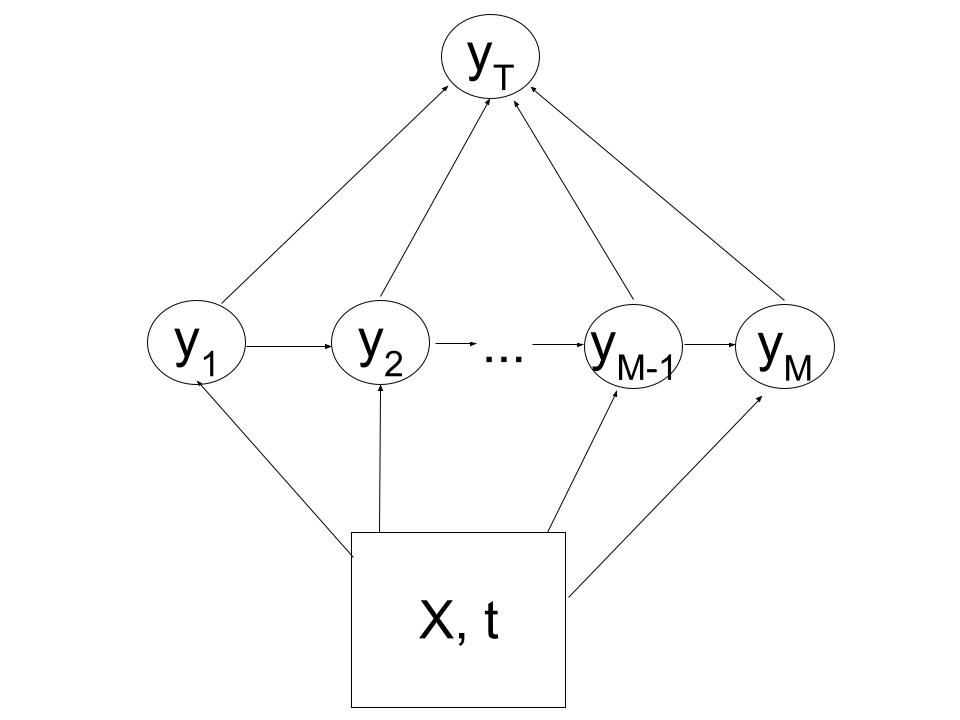

## AdaBoost

Los dos paquetes de sklearn a utilizar son AdaBoostClassifier y AdaBoostRegressor.

Los hiperparametros especificos de AdaBoost son:

*   base_estimator: el predictor debil que utiliza. Por defecto es un DecisionStump.
*   n_estimator: Cuantos estimadores utilizar.
*   learning_rate: La tasa de aprendizaje al tomar un nuevo estimador. A menor learning_rate, se necesitan mas estimadores para fittear los datos. Es un regularizador del algoritmo.
*   algorithm: Exclusivo para clasificacion. El algoritmo de resolucion que utiliza `sklearn`. Hay dos opciones: `SAMME` y `SAMME.R`. El primero vale para todos pero es mas lento en converger. El segundo trabaja con probabilidades y por lo tanto el `base_estimator` necesita tener un `predict_proba`.
*   loss: Exclusivo para regresion. Es que funcion de perdida utiliza el algoritmo. Las opciones son `linear`,`square` y `exponential`.

De la clase fitteada uno puede obtener:

*   estimators_: La lista de los estimadores.
*   estimators_weights_: Los pesos de cada estimador. 1 para clasificacion `SAMME.R`, distinto de 1 para regresion y clasificacion con `SAMME`.
*   estimators_errors_: El error de cada estimador al evaluarse en el conjunto de datos. No es el error al aplicar el ensemble.
*   feature_importances_: La importancia de los features.

Ademas, el AdaBoost posee el .staged_ que permite evaluar el ensemble a cada paso como si estuviese terminado.


### Ejemplo de AdaBoostClassifier con make_moons:

In [ ]:
X, y = datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Ejemplo `sample_weight`

$ \text{Loss} = \sum_{i}w_{i}\text{Loss}_{i}$

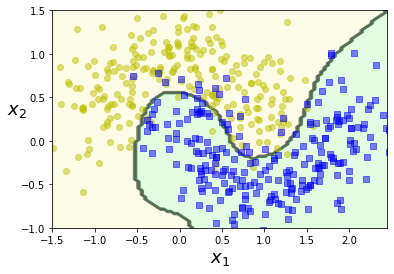

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train,sample_weight=np.where(X_train[:,1]>-0.5,100.0,1.0))

plot_decision_boundary(svc, X, y)
# plt.axhline(-0.5)

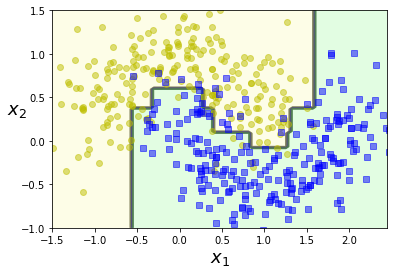

In [ ]:
n_estimators=300
#AdaBoostClassifier(base_estimator=SVC/DT/Perceptron/RL,n_estimator= cuantos voy a considerar, algorithm=que algoritmo uso, learning_rate = ,...)
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=n_estimators,
    algorithm="SAMME", learning_rate=0.5, random_state=42)

ada_clf.fit(X_train,y_train)
plot_decision_boundary(ada_clf, X, y)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
preds = cross_val_predict(ada_clf,X_train,y_train)
cm = confusion_matrix(y_train,preds)#,ada_clf.predict(X_train))
print(cm)
print(accuracy_score(y_train,preds))#ada_clf.predict(X_test)))

[[170  19]
 [ 15 171]]
0.9093333333333333


Veamos un poco los estimadores con sus pesos y su error

In [ ]:
print(np.asarray(ada_clf.estimators_).shape)

(300,)


[Text(167.4, 163.07999999999998, 'X[1] <= -0.091\ngini = 0.497\nsamples = 375\nvalue = [0.541, 0.459]'),
 Text(83.7, 54.360000000000014, 'gini = 0.232\nsamples = 118\nvalue = [0.038, 0.244]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.42\nsamples = 257\nvalue = [0.503, 0.216]')]

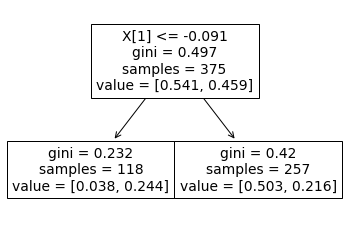

In [ ]:
from sklearn.tree import plot_tree
plot_tree(ada_clf.estimators_[1])

Veamos los pesos y los errores.

(300,)


Text(0, 0.5, 'Peso $\\alpha$')

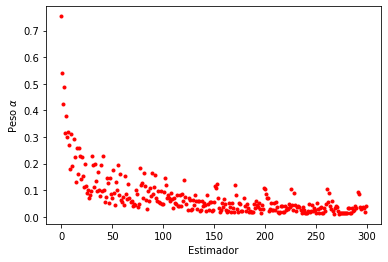

In [ ]:
## Si es SAMME.R todos tienen el mismo peso mientras
print(ada_clf.estimator_weights_.shape)
plt.plot(ada_clf.estimator_weights_,'r.')
plt.xlabel('Estimador')
plt.ylabel(r'Peso $\alpha$')

(300,)


Text(0, 0.5, 'Error')

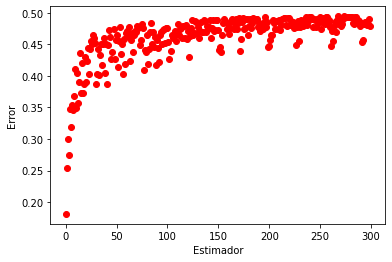

In [ ]:
print(ada_clf.estimator_errors_.shape)
plt.plot(ada_clf.estimator_errors_,'ro')
plt.xlabel('Estimador')
plt.ylabel('Error')

Exploremos la evolucion en funcion del numero de estimadores

In [ ]:
for nest, est_pred in enumerate(ada_clf.staged_predict(X_train[:2])):
  print(nest, est_pred[:2])

0 [1 1]
1 [1 1]
2 [1 0]
3 [1 1]
4 [1 0]
5 [1 1]
6 [1 1]
7 [1 1]
8 [1 1]
9 [1 0]
10 [1 1]
11 [1 1]
12 [1 1]
13 [1 1]
14 [1 0]
15 [1 1]
16 [1 1]
17 [1 0]
18 [1 1]
19 [1 0]
20 [1 1]
21 [1 0]
22 [1 0]
23 [1 1]
24 [1 0]
25 [1 0]
26 [1 0]
27 [1 0]
28 [1 0]
29 [1 0]
30 [1 0]
31 [1 0]
32 [1 0]
33 [1 0]
34 [1 0]
35 [1 0]
36 [1 0]
37 [1 0]
38 [1 0]
39 [1 0]
40 [1 0]
41 [1 0]
42 [1 0]
43 [1 0]
44 [1 0]
45 [1 1]
46 [1 0]
47 [1 0]
48 [1 0]
49 [1 0]
50 [1 0]
51 [1 1]
52 [1 0]
53 [1 0]
54 [1 0]
55 [1 0]
56 [1 0]
57 [1 0]
58 [1 0]
59 [1 0]
60 [1 0]
61 [1 0]
62 [1 0]
63 [1 0]
64 [1 0]
65 [1 0]
66 [1 0]
67 [1 0]
68 [1 0]
69 [1 0]
70 [1 0]
71 [1 0]
72 [1 0]
73 [1 0]
74 [1 0]
75 [1 0]
76 [1 0]
77 [1 0]
78 [1 0]
79 [1 0]
80 [1 0]
81 [1 0]
82 [1 0]
83 [1 0]
84 [1 0]
85 [1 0]
86 [1 0]
87 [1 0]
88 [1 0]
89 [1 0]
90 [1 0]
91 [1 0]
92 [1 0]
93 [1 0]
94 [1 0]
95 [1 0]
96 [1 0]
97 [1 0]
98 [1 0]
99 [1 0]
100 [1 0]
101 [1 0]
102 [1 0]
103 [1 0]
104 [1 0]
105 [1 0]
106 [1 0]
107 [1 0]
108 [1 0]
109 [1 0]
110 [1 0]


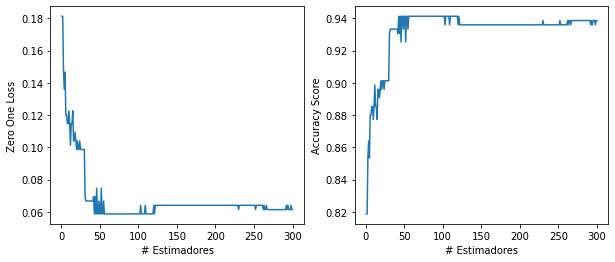

In [ ]:
from sklearn.metrics import zero_one_loss, accuracy_score #cuenta la fraccion de mal clasificados

err_train = np.zeros((n_estimators,2))
for i, y_pred in enumerate(ada_clf.staged_predict(X_train)):
  err_train[i,0] = zero_one_loss(y_pred, y_train)
  err_train[i,1] = accuracy_score(y_pred, y_train)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

ax[0].plot(np.arange(n_estimators) + 1, err_train[:,0])
ax[1].plot(np.arange(n_estimators) + 1, err_train[:,1])

ax[0].set_xlabel('# Estimadores')
ax[1].set_xlabel('# Estimadores')
ax[0].set_ylabel('Zero One Loss')
ax[1].set_ylabel('Accuracy Score')
plt.show()

### Veamos el efecto del Learning rate en la convergencia:

El ejemplo lindo del Geron:

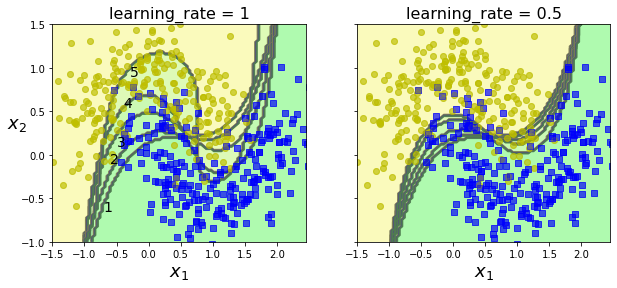

In [ ]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

Asi lo hice yo

In [ ]:
y_pred.shape

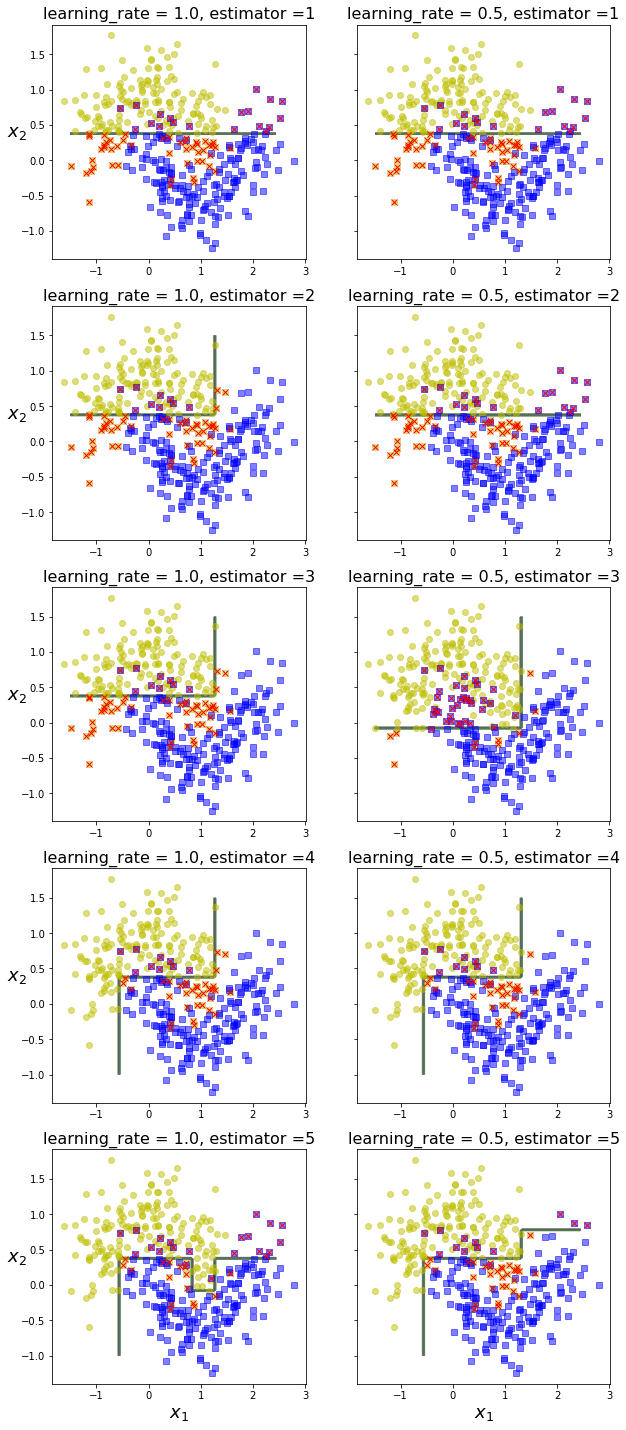

In [ ]:
m = len(X_train)

learnings = [1.0,0.5]
fix, axes = plt.subplots(nrows=5,ncols=len(learnings), figsize=(5*len(learnings),25), sharey=True)
for subplot, learning_rate in enumerate(learnings):
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=5,
    algorithm="SAMME.R", learning_rate=learning_rate, random_state=42)
    ada_clf.fit(X_train,y_train)
    y_pred_train=np.zeros((5,X_train.shape[0]))
    for nest_train, est_dec_train in enumerate(ada_clf.staged_predict(X_train)):
      y_pred_train[nest_train]=est_dec_train
    #axes=[-1.5, 2.45, -1, 1.5]
    alpha=0.5
    x1s = np.linspace(-1.5, 2.45, 100)
    x2s = np.linspace(-1, 1.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    for nest, est_dec in enumerate(ada_clf.staged_predict(X_new)):
      y_pred_estimator_only=ada_clf.estimators_[nest].predict(X_new).reshape(x1.shape)
      y_pred = est_dec.reshape(x1.shape)
      custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
      axes[nest,subplot].plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo", alpha=alpha)
      axes[nest,subplot].plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs", alpha=alpha)
      axes[nest,subplot].plot(X_train[:, 0][y_pred_train[nest] != y_train], X_train[:, 1][y_pred_train[nest] != y_train], "rx", alpha=1.0)     
      axes[nest,0].set_ylabel(r"$x_2$", fontsize=18, rotation=0)
      axes[nest,subplot].contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
      #axes[nest,subplot].contour(x1, x2, y_pred_estimator_only, cmap='plasma', alpha=0.8)
      axes[nest,subplot].set_title("learning_rate = {}, estimator ={}".format(learning_rate,nest+1), fontsize=16)
#      plt.show()
    axes[-1,subplot].set_xlabel(r"$x_1$", fontsize=18)
plt.show()

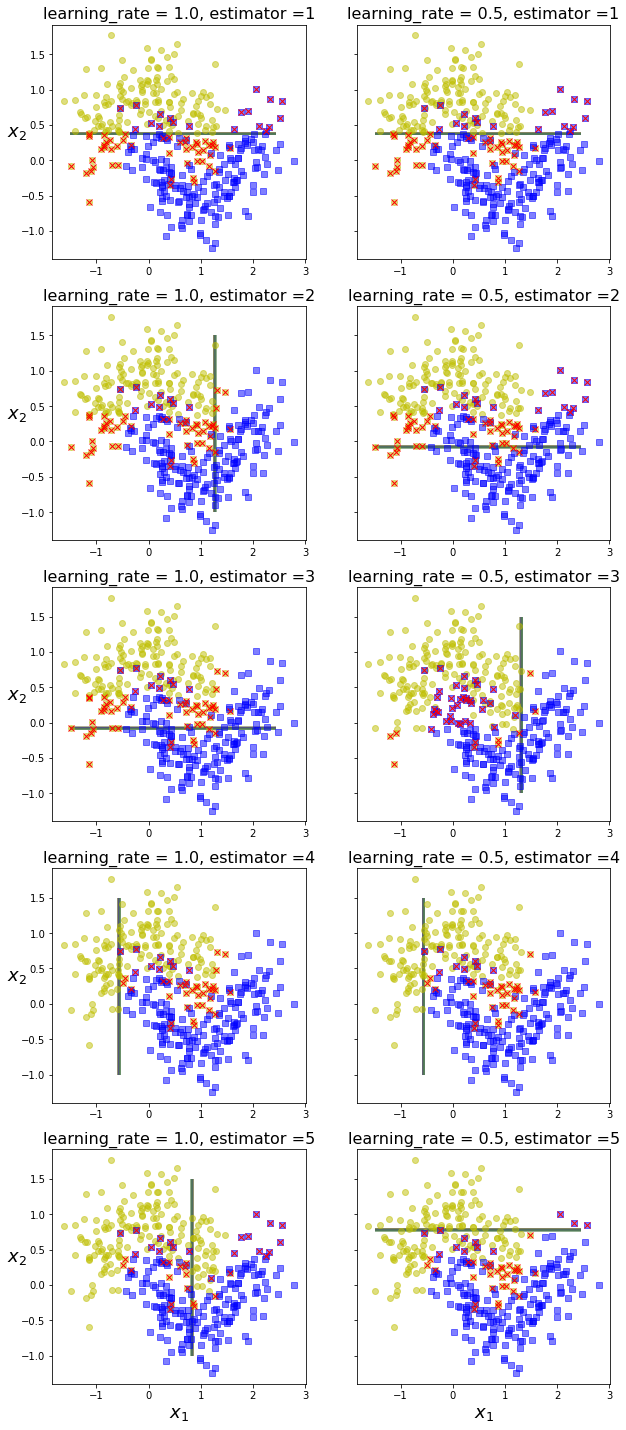

In [ ]:
m = len(X_train)

learnings = [1.0,0.5]
fix, axes = plt.subplots(nrows=5,ncols=len(learnings), figsize=(5*len(learnings),25), sharey=True)
for subplot, learning_rate in enumerate(learnings):
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=5,
    algorithm="SAMME.R", learning_rate=learning_rate, random_state=42)
    ada_clf.fit(X_train,y_train)
    y_pred_train=np.zeros((5,X_train.shape[0]))
    for nest_train, est_dec_train in enumerate(ada_clf.staged_predict(X_train)):
      y_pred_train[nest_train]=est_dec_train
    #axes=[-1.5, 2.45, -1, 1.5]
    alpha=0.5
    x1s = np.linspace(-1.5, 2.45, 100)
    x2s = np.linspace(-1, 1.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    for nest, est_dec in enumerate(ada_clf.estimators_):
      y_pred = est_dec.predict(X_new).reshape(x1.shape)
      custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
      axes[nest,subplot].plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo", alpha=alpha)
      axes[nest,subplot].plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs", alpha=alpha)
      axes[nest,subplot].plot(X_train[:, 0][y_pred_train[nest] != y_train], X_train[:, 1][y_pred_train[nest] != y_train], "rx", alpha=1.0)     
      axes[nest,0].set_ylabel(r"$x_2$", fontsize=18, rotation=0)
      axes[nest,subplot].contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
      axes[nest,subplot].set_title("learning_rate = {}, estimator ={}".format(learning_rate,nest+1), fontsize=16)
#      plt.show()
    axes[-1,subplot].set_xlabel(r"$x_1$", fontsize=18)
plt.show()

### Aca un ejemplo comparando algoritmos:

Otra virtud del AdaBoost es el stage_predict y stage_predict_proba, que permite ver como evoluciona el error al ir agregando iteraciones. Utilizemoslo para comparar algoritmos y ver la converfencia.

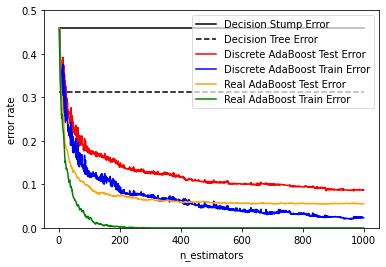

In [ ]:
n_estimators = 1000
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.

X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

X_test, y_test = X[2000:], y[2000:]
X_train, y_train = X[:2000], y[:2000]

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

### Un ejemplo de AdaBoostRegressor

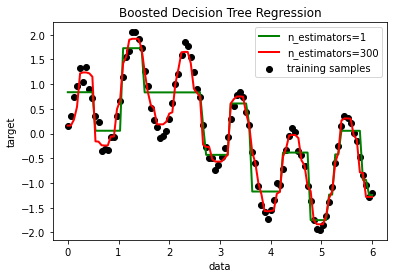

In [ ]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),loss='square',
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

(300,)


Text(0, 0.5, 'Peso')

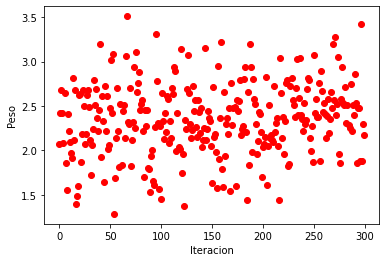

In [ ]:
print(regr_2.estimator_weights_.shape)
plt.plot(regr_2.estimator_weights_,'ro')
plt.xlabel('Iteracion')
plt.ylabel('Peso')

(300,)


Text(0, 0.5, 'Error')

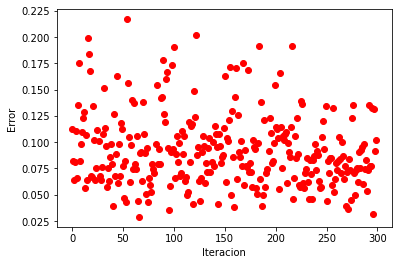

In [ ]:
print(regr_2.estimator_errors_.shape)
plt.plot(regr_2.estimator_errors_,'ro')
plt.xlabel('Iteracion')
plt.ylabel('Error')

## GradientBoosting

Antes de utilizar paquetes especificos veamos un ejemplo del Geron que muestra como funciona Gradient Boosting

### Ejemplo del Geron:

GradientBoosting busca al final hacer algo parecido a lo siguiente.

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X) #residuos del primer árbol
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X) #residuos del segundo árbol
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

Y la prediccion seria de esta manera:

In [ ]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))#sumo las predicciones
y_pred

array([0.75026781])

Ahora veamoslo de manera grafica

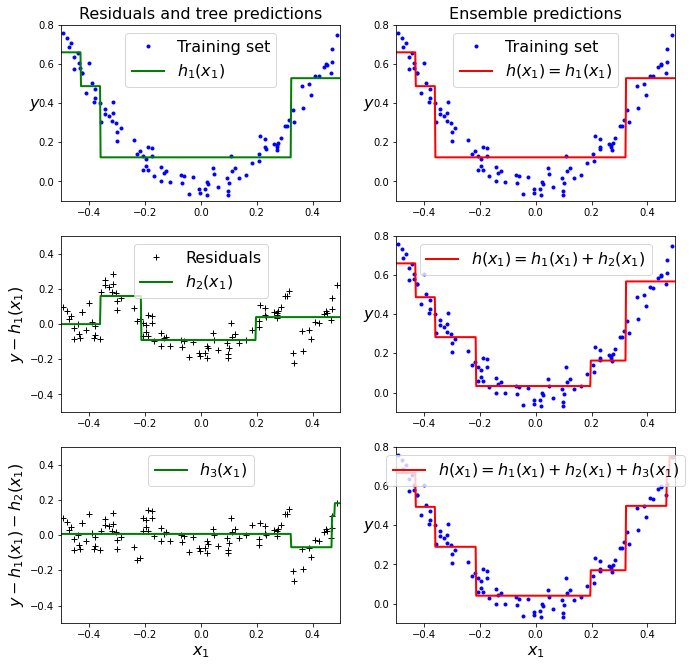

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

### La implementacion en `sklearn`

Los dos paquetes de sklearn a utilizar son GradientBoostingClassifier y GradientBoostingRegressor. Los hiperparametros son un poco mas largos de explicar asi que va charlado.


In [ ]:
GradientBoostingClassifier?

In [ ]:
GradientBoostingRegressor?

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=50, random_state=42)

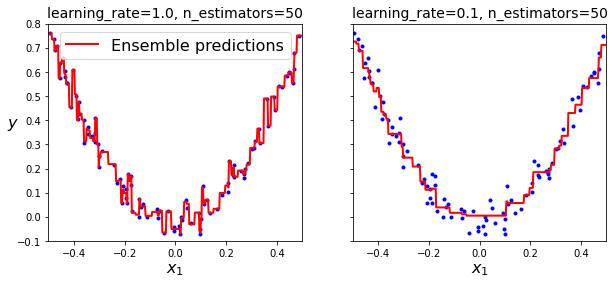

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

### Eleccion del numero optimo de arboles

Si uno tiene demasiados estimadores, puede sobreajustar. El objetivo es entonces encontrar el numero optimo de estimadores que den un buen ajuste. Esto se puede hacer utilizando lo que se llama **early stopping**. El **early stopping** consiste en utilizar un conjunto de validacion para evaluar el predictor en funcion del numero de estimadores. Si la metrica evaluada en el conjunto de validacion empieza a empeorar, entonces frenamos y nos quedamos con ese numero de estimadores.

In [ ]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [np.sqrt(mean_squared_error(y_val, y_pred))
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [ ]:
print(bst_n_estimators)

56


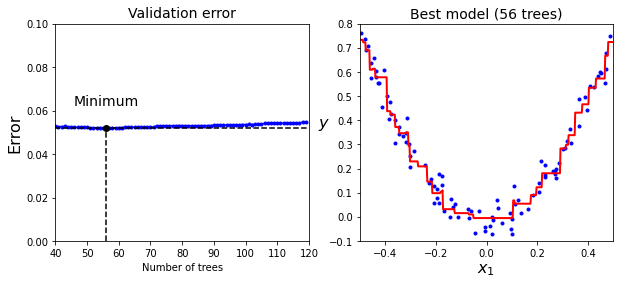

In [ ]:
min_error = np.min(errors)
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([40, 120, 0, 0.1])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

Asi como lo hicimos mas arriba, evitamos un poco mas el sobreajuste. Sin embargo, sigo entrenando con todos los estimadores posibles, lo que es costoso. El early stopping puede incorporarse de manera tal que se detenga al momento en que vea el error de validacion comenzar a subir.

Para eso, utilizo la opcion `warm_start`. Esta opcion almacena los arboles utilizados en `.fit` y permite entrenar de manera incremental.

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [ ]:
print(gbrt.n_estimators)
print("Minimo MSE en el conjunto de validacion:", min_val_error)


61
Minimo MSE en el conjunto de validacion: 0.002712853325235463


In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120,warm_start=True, random_state=42,validation_fraction=0.2,n_iter_no_change=5)
gbrt.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=120, n_iter_no_change=5,
                          random_state=42, validation_fraction=0.2,
                          warm_start=True)

In [ ]:
gbrt.n_estimators

120

### Stochastic gradient boosting

Hasta ahora no utilizamos el hiperparametro `subsample`.  Este hiperparametro define si entrenamos cada predictor sobre una fraccion elegida al azar de los datos. Esta tecnica baja la varianza todavia mas y acelera el entrenamiento.

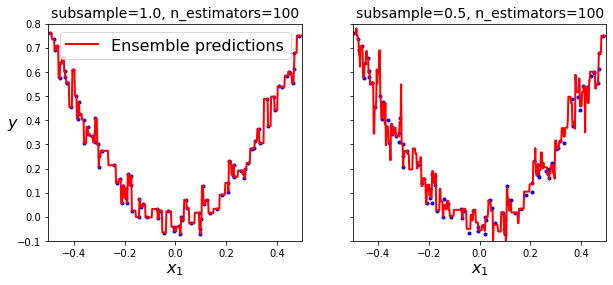

In [ ]:
gbrt_all = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0, random_state=42)
gbrt_all.fit(X, y)

gbrt_stochastic = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0,subsample=0.5, random_state=42)
gbrt_stochastic.fit(X, y)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt_all], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("subsample={}, n_estimators={}".format(gbrt_all.subsample, gbrt_all.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_stochastic], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("subsample={}, n_estimators={}".format(gbrt_stochastic.subsample, gbrt_stochastic.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

### XGBoost

Extreme Gradient Boosting, o `XGBoost`, es una implementacion optimizada de Gradient Boosting que busca ser rapida, escaleable y portatil. Es muy popular (como se puede ver en kaggle) y puede utilizarse de manera similiar a `sklearn` y se juntan muy bien. En particular, la clase `XBGRegressor` es equivalente un modelo de `sklearn`.

In [ ]:
!pip install xgboost

     |████████████████████████████████| 173.5 MB 28 kB/s  eta 0:00:01
You should consider upgrading via the '/home/manuel/jupyter/jupyterenvironment/bin/python -m pip install --upgrade pip' command.


In [ ]:
import xgboost
from xgboost import XGBRegressor, XGBClassifier

La documentación relevante se encuentra [acá](https://xgboost.readthedocs.io/en/latest/). Los hiperparametros relevantes para nosotros son:

- learning rate (1 por defecto)
- gamma / min_split_loss (0 por defecto): la minima reducción de perdida para que el árbol siga diviendiendo una hoja
- max_depth (6 por defecto)
- min_child_weight (1 por defecto): la minima cantidad de mediciones pesadas que tienen que quedar en un hijo al partir un nodo hoja
- subsample (1 por defecto)
- colsample_bytree, colsample_bylevel, colsample_bynode (1 por defecto los tres): la fracción de features considerados por árbol, por nível y por nodo.
- reg_lambda (1 por defecto): termino de penalización L2 en los pesos
- reg_alpha (0 por defecto): termino de penalización L1 en los pesos
- objective: especifica la tarea a cumplir. 'reg:squarederror' es la pérdida de cuadrados mínimos.  'binary:logistic' o 'multi:softmax'son utiles para clasificación con outputs probabilisticos. Hay varias opciones más para jugar.

In [ ]:
XGBRegressor?

In [ ]:
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)
print(X.head())
print(X.info())
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train,test_size=0.2)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-

In [ ]:
regressor = XGBRegressor(
    n_estimators=200,
    learning_rate=0.5,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='reg:squarederror',
    max_depth=3)

Entrenamos con `fit`, especificando algunos hiperparametros

In [ ]:
regressor.fit(X_train_2,y_train_2,eval_set=[(X_train_2, y_train_2), (X_val, y_val)],
        eval_metric='rmse',early_stopping_rounds=5,#viene con early stopping!
        verbose=True)

[0]	validation_0-rmse:12.81359	validation_1-rmse:11.20857
[1]	validation_0-rmse:6.97078	validation_1-rmse:6.02616
[2]	validation_0-rmse:4.19469	validation_1-rmse:4.20685
[3]	validation_0-rmse:3.03174	validation_1-rmse:3.66959
[4]	validation_0-rmse:2.53065	validation_1-rmse:3.52306
[5]	validation_0-rmse:2.26436	validation_1-rmse:3.53187
[6]	validation_0-rmse:2.07393	validation_1-rmse:3.49810
[7]	validation_0-rmse:1.99243	validation_1-rmse:3.50574
[8]	validation_0-rmse:1.91901	validation_1-rmse:3.50379
[9]	validation_0-rmse:1.86824	validation_1-rmse:3.47084
[10]	validation_0-rmse:1.79043	validation_1-rmse:3.45136
[11]	validation_0-rmse:1.73662	validation_1-rmse:3.46157
[12]	validation_0-rmse:1.68624	validation_1-rmse:3.47966
[13]	validation_0-rmse:1.66110	validation_1-rmse:3.40683
[14]	validation_0-rmse:1.58697	validation_1-rmse:3.43595
[15]	validation_0-rmse:1.51614	validation_1-rmse:3.42347
[16]	validation_0-rmse:1.45399	validation_1-rmse:3.41200
[17]	validation_0-rmse:1.40090	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
np.sqrt(mean_squared_error(regressor.predict(X_val),y_val))

3.395721292492806

In [ ]:
regressor.evals_result()

{'validation_0': OrderedDict([('rmse',
               [12.813593,
                6.97078,
                4.194687,
                3.031737,
                2.530648,
                2.264361,
                2.073933,
                1.992435,
                1.91901,
                1.868241,
                1.790434,
                1.736623,
                1.686236,
                1.661102,
                1.586974,
                1.51614,
                1.453986,
                1.400896,
                1.352225,
                1.296395,
                1.264089,
                1.232242,
                1.165661,
                1.134854])]),
 'validation_1': OrderedDict([('rmse',
               [11.208567,
                6.026161,
                4.206845,
                3.669585,
                3.523057,
                3.531869,
                3.498095,
                3.505739,
                3.503787,
                3.470843,
                3.451356,
         

Podemos explorar la importancia de los features:

In [ ]:
for i in range(len(boston.feature_names)):
  print((boston.feature_names[i],regressor.feature_importances_[i]))

('CRIM', 0.03004474)
('ZN', 0.010895829)
('INDUS', 0.019015336)
('CHAS', 0.003030494)
('NOX', 0.08810629)
('RM', 0.40636033)
('AGE', 0.01964916)
('DIS', 0.07100928)
('RAD', 0.0182927)
('TAX', 0.020428361)
('PTRATIO', 0.02691121)
('B', 0.019817317)
('LSTAT', 0.26643893)


Dado que esta tan optimizado y es tan rapido, probemos con `cross_val_score`.

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(regressor,X_train,y_train,scoring='neg_root_mean_squared_error')
print(-scores.mean(),scores.std())

3.7814989959922642 0.7254327123875035


Una vez entrenado, es posible guardar el modelo

In [ ]:
regressor.save_model('xbg_modelo_1.json')

In [ ]:
params=regressor.get_xgb_params()
regressor_2=XGBRegressor(**params)
regressor_2.get_xgb_params()

In [ ]:
regressor_2.load_model('xbg_modelo_1.json')
regressor_2.get_xgb_params()

In [ ]:
regressor.predict(X_train[:2])

In [ ]:
regressor_2.predict(X_train[:2])